In [104]:
import pandas as pd

pd.options.display.max_columns = 100

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Import regression
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from matplotlib.ticker import StrMethodFormatter

# Dimensionality reduction and clustering
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans

from scipy import stats

# Import imputers
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler

Notes from 2019-02-05 and 2019-02-26 meetings with Daniela

* Order CBG, THC, CBD, CBC, CBN, THCV, CBDV
* Change colors on Fig 7 & 8 to be different from imputation colors
* PCAs for supplement
* Remove Raw from Fig 6 showing distributions of THC vs. CBD
* Put pair plot on same axes to show smaller relative size for CBC, etc.
* Tables with number of samples


In [5]:
order = ['CBG', 'THC', 'CBD', 'CBC', 'CBN', 'THCV', 'CBDV']

In [6]:
df = pd.read_csv('deduplicated_23092019.csv')
print(len(df))
df.head()

17600


samp_name  samp_id samp_location samp_date samp_time    cbga     cbg  \
0            Batch  1387-R1      Colorado   9/20/14  12:14:00     NaN     NaN   
1      Frosty Kush  1001-12    California  12/17/11  10:08:56  0.4401  0.1029   
2       Cannatonic  1001-13    California  12/17/11  10:52:33  0.2751  0.1977   
3    Terpene Queen  1001-14    California  12/17/11  12:19:48  0.0985  0.4257   
4  Pineapple Purps  1001-15    California  12/22/11  15:19:57  0.5639  0.0481   

     thcaI   thcaII  avg_thca  thca4c  thcva  d9thcI  d9thcII  avg_d9thc  \
0      NaN   0.0461   0.04610     NaN    NaN  0.0464   0.0896    0.06800   
1  15.1366  15.4349  15.28575  0.0365    NaN  1.1851   1.0984    1.14175   
2   0.7198   0.7351   0.72745  0.1181    NaN  0.1196   0.1186    0.11910   
3   4.1346   4.1908   4.16270  0.0533    NaN  1.4245   1.3010    1.36275   
4   8.0381   8.1774   8.10775  0.0263    NaN  0.2541   0.2255    0.23980   

    d8thc  thcv    cbna     cbn     cbda  cbdva     cbd  cbdv    cbca     cbc  \
0  0.0598   NaN     NaN     NaN   0.0172    NaN     NaN   NaN     NaN  0.0944   
1     NaN   NaN  0.0204  0.2212   0.0917    NaN  0.1184   NaN  0.0891  0.0092   
2     NaN   NaN     NaN  0.1687  21.3001    NaN  0.8088   NaN  0.3792  0.0770   
3     NaN   NaN  0.0089     NaN  14.2062    NaN  1.1433   NaN  0.1895  0.0407   
4     NaN   NaN  0.0039     NaN   0.0375    NaN  0.1207   NaN  0.0304  0.0102   

     cbla                   source_file  comb_cbg   comb_thc  comb_thcv  \
0     NaN                       DEN.csv       NaN   0.108568        NaN   
1  0.0777  Halent Data From Travis.xlsx  0.490188  14.593210        NaN   
2     NaN  Halent Data From Travis.xlsx  0.439788   0.759256        NaN   
3  0.1953  Halent Data From Travis.xlsx  0.512380   5.025926        NaN   
4     NaN  Halent Data From Travis.xlsx  0.544332   7.374620        NaN   

   comb_cbc   comb_cbd  comb_cbdv  comb_cbn samp_date_clean  samp_year  
0  0.094400   0.015136        NaN       NaN         9/20/14       2014  
1  0.087608   0.199096        NaN  0.239152        12/17/11       2011  
2  0.410696  19.552888        NaN  0.168700        12/17/11       2011  
3  0.207460  13.644756        NaN  0.007832        12/17/11       2011  
4  0.036952   0.153700        NaN  0.003432        12/22/11       2011

In [7]:
comb_df = df[['comb_cbg','comb_thc','comb_thcv','comb_cbc','comb_cbd','comb_cbdv','comb_cbn']]
comb_df.columns = [c[5:].upper() for c in comb_df.columns]
comb_df = comb_df[order]
comb_df = comb_df.dropna(how='all')
comb_df['THC'] = comb_df['THC'].apply(np.abs)

comb_df.head()

CBG        THC        CBD       CBC       CBN  THCV  CBDV
0       NaN   0.108568   0.015136  0.094400       NaN   NaN   NaN
1  0.490188  14.593210   0.199096  0.087608  0.239152   NaN   NaN
2  0.439788   0.759256  19.552888  0.410696  0.168700   NaN   NaN
3  0.512380   5.025926  13.644756  0.207460  0.007832   NaN   NaN
4  0.544332   7.374620   0.153700  0.036952  0.003432   NaN   NaN

In [8]:
log_comb_df = comb_df.apply(np.log)

log_comb_df.head()

CBG       THC       CBD       CBC       CBN  THCV  CBDV
0       NaN -2.220379 -4.190679 -2.360214       NaN   NaN   NaN
1 -0.712966  2.680556 -1.613968 -2.434883 -1.430656   NaN   NaN
2 -0.821462 -0.275416  2.973123 -0.889902 -1.779633   NaN   NaN
3 -0.668689  1.614610  2.613355 -1.572817 -4.849537   NaN   NaN
4 -0.608196  1.998044 -1.872753 -3.298136 -5.674612   NaN   NaN

In [9]:
for col in order:
    non_null_count = comb_df[col].notnull().sum()
    fraction = non_null_count/len(comb_df)
    print("There are {0:,} non-null values ({1:.2%}) for {2}.".format(non_null_count,1-fraction,col))

There are 12,270 non-null values (30.28%) for CBG.
There are 17,346 non-null values (1.44%) for THC.
There are 10,948 non-null values (37.80%) for CBD.
There are 6,487 non-null values (63.14%) for CBC.
There are 6,675 non-null values (62.07%) for CBN.
There are 3,311 non-null values (81.19%) for THCV.
There are 597 non-null values (96.61%) for CBDV.


In [10]:
comb_df.describe().T.loc[order,['mean','std','max']]

mean       std        max
CBG    0.496402  0.465475  11.575060
THC   14.041613  6.445050  33.956296
CBD    1.679713  3.907400  25.800832
CBC    0.120340  0.127702   1.790736
CBN    0.067415  0.175214   2.946160
THCV   0.198200  0.412000   6.620201
CBDV   0.069499  0.106654   0.832677

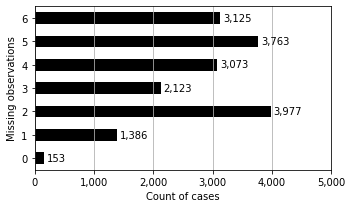

In [11]:
missing_counts = comb_df.isnull().sum(1).value_counts().sort_index().reindex(range(0,7))

f,ax = plt.subplots(1,1,figsize=(5,3))
missing_counts.plot(kind='barh',color='k',zorder=1,ax=ax)
ax.set_xlabel('Count of cases')
ax.set_ylabel('Missing observations')
ax.set_xlim((0,5000))
ax.grid(which='major',axis='x',zorder=0)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_width()), 
                (p.get_width()+50, p.get_y()+.125),
                size=10,color='k')

f.tight_layout()
f.savefig('missing_observations.pdf',dpi=300)
f.savefig('missing_observations.png',dpi=300)

In [12]:
df['samp_location'].value_counts()#.sum()

California    16418
Colorado        936
Washington      244
Alaska            2
Name: samp_location, dtype: int64

In [13]:
pd.crosstab(df['samp_location'],df['samp_year'])

samp_year      2011  2012  2013  2014  2015  2016  2017  2018
samp_location                                                
Alaska            0     0     0     0     0     0     2     0
California      361   574   827  1364  1113     5  5727  6447
Colorado          0     0     0   936     0     0     0     0
Washington        0     0     0   244     0     0     0     0

## Predict on `full_df`

Predictions for the observations where there is no missing data.

In [14]:
full_df = comb_df.dropna(how='any')
print(len(full_df))
#full_df.columns = [c[5:] for c in full_df.columns]
full_df.head()

153


CBG        THC       CBD       CBC       CBN      THCV      CBDV
4090  0.036987  19.336152  0.081447  0.045982  0.016853  0.096586  0.005745
4214  0.802702  14.883264  0.035713  0.294584  0.172379  1.429572  0.047391
4217  0.409611  11.427504  0.030915  0.090029  0.074793  0.112781  0.025290
4218  0.306400   3.080000  5.298000  0.148800  0.028160  0.308000  0.193600
4221  2.060009  22.203104  0.052538  0.100818  0.025316  1.739162  0.035531

In [15]:
log_full_df = full_df.apply(np.log)

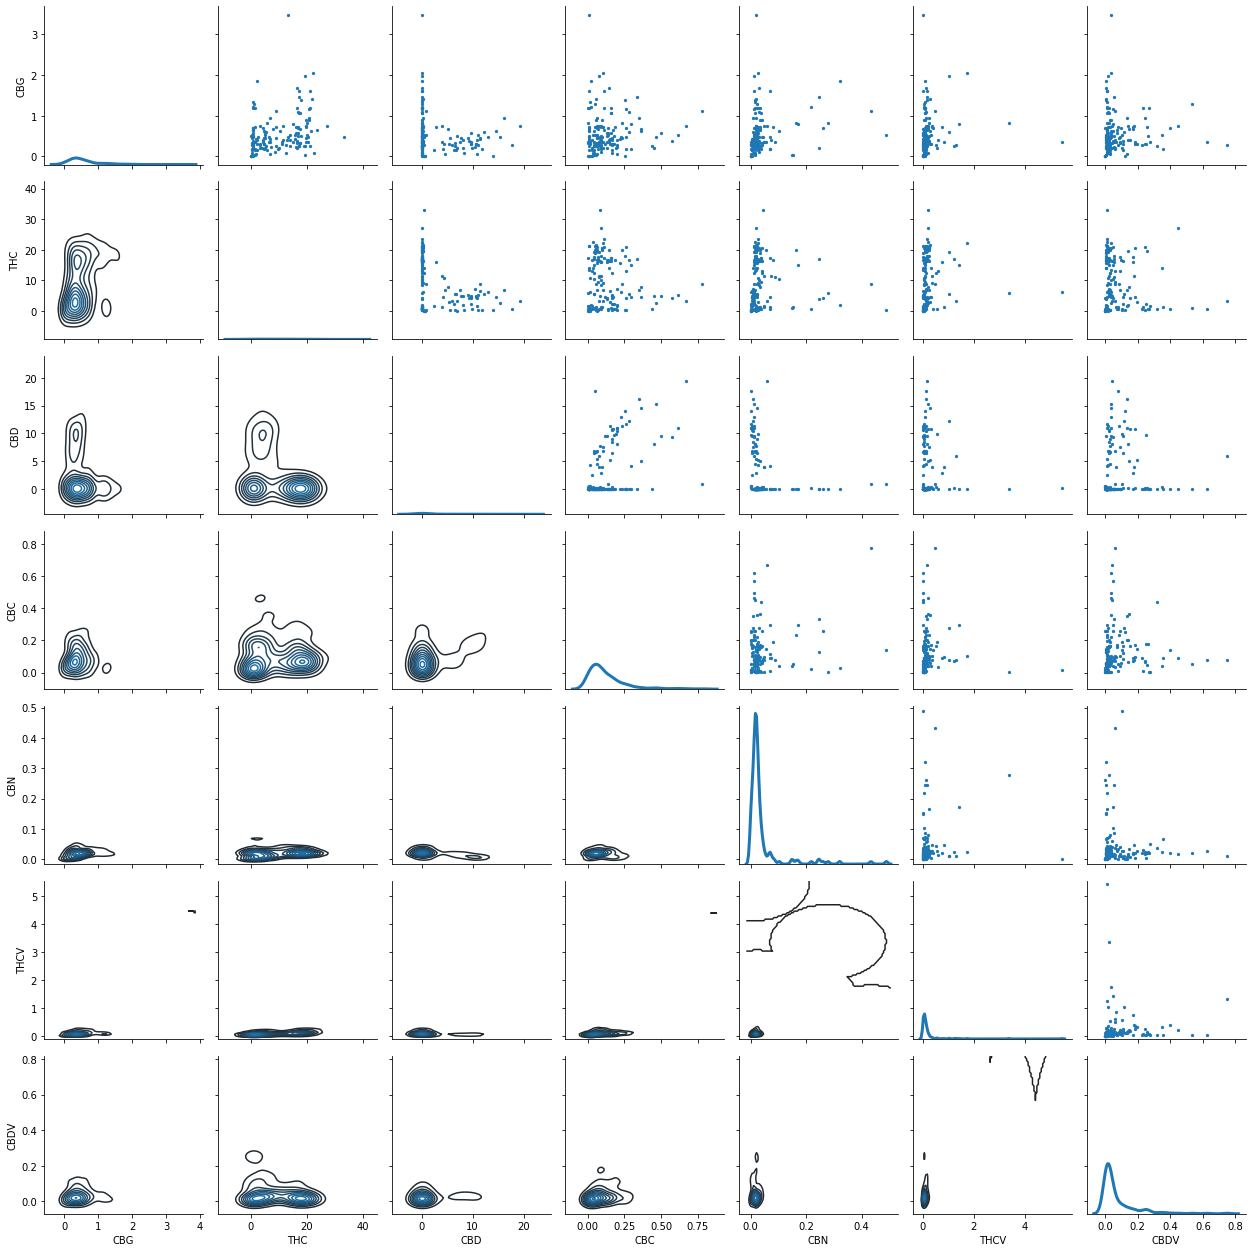

In [16]:
#ss = StandardScaler()
#X_full = ss.fit_transform(full_df)

g = sb.PairGrid(full_df)
g.map_upper(plt.scatter,s=5)
g.map_lower(sb.kdeplot)
g.map_diag(sb.kdeplot, lw=3, legend=False)

plt.tight_layout()
plt.savefig('bivariate.pdf',dpi=300)
plt.savefig('bivariate.png',dpi=300)

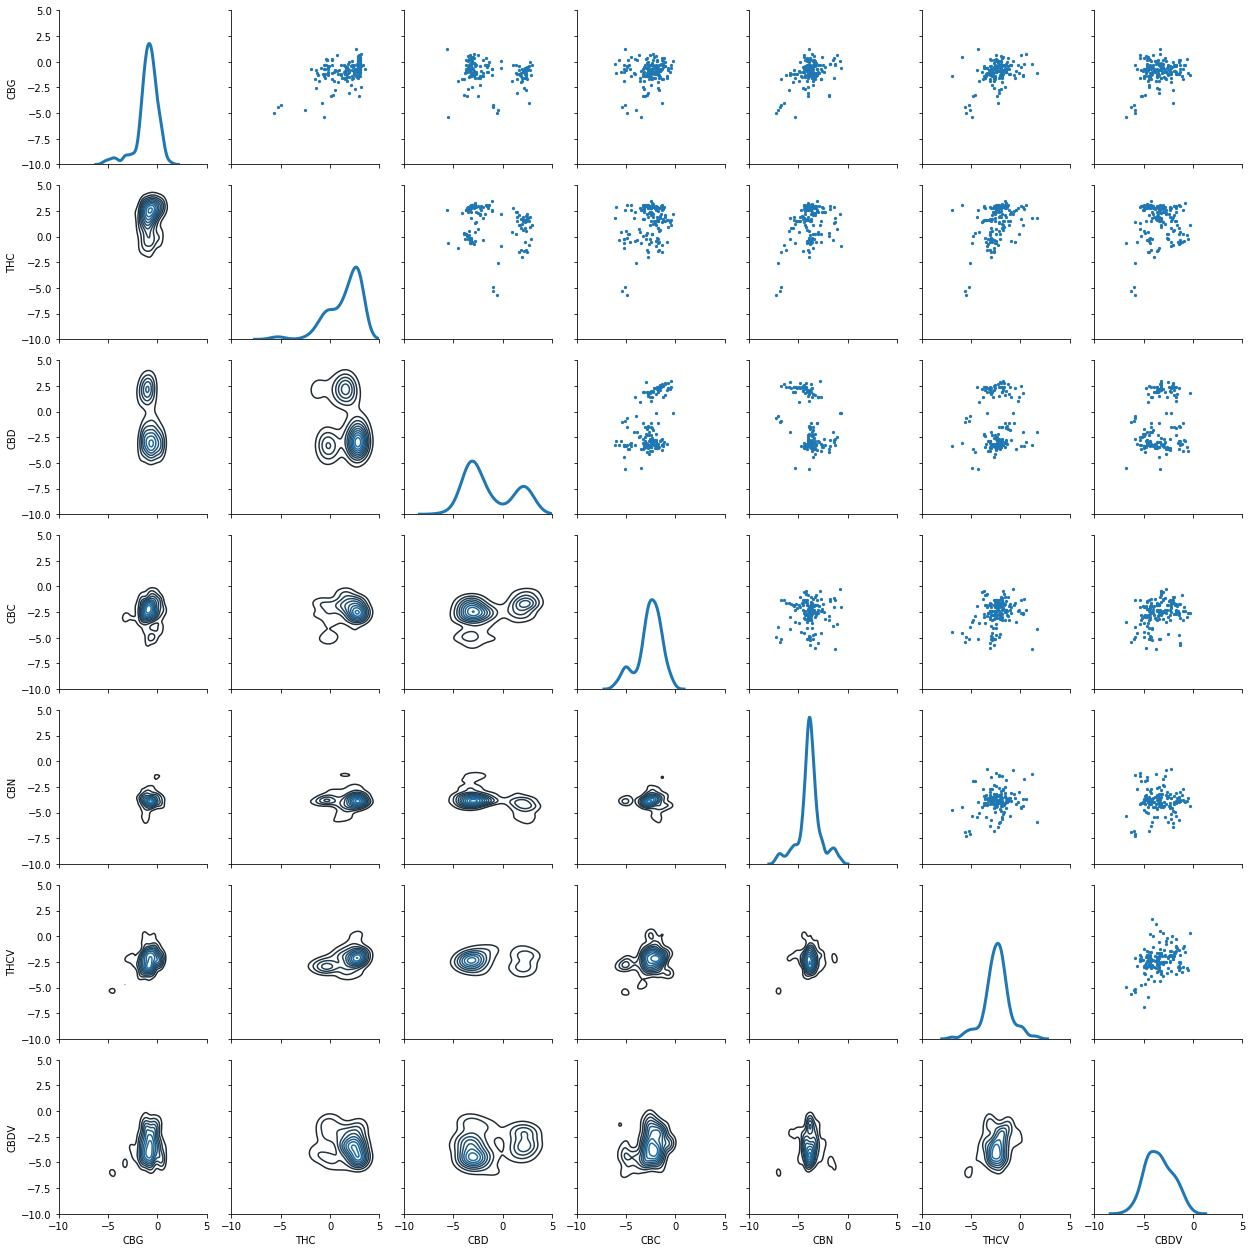

In [17]:
#ss = StandardScaler()
#X_full = ss.fit_transform(full_df)

g = sb.PairGrid(log_full_df)
g.map_upper(plt.scatter,s=5)
g.map_lower(sb.kdeplot)
g.map_diag(sb.kdeplot, lw=3, legend=False)

for ax in g.axes.flatten():
    ax.set_xlim((-10,5))
    ax.set_ylim((-10,5))

plt.tight_layout()
plt.savefig('bivariate_log.pdf',dpi=300)
plt.savefig('bivariate_log.png',dpi=300)

# Model on complete data

## Regression

In [18]:
lr_cv_scores = {}
lr_models = {}
for var in full_df.columns:
    
    # Choose estimator
    lr = LinearRegression()

    # Make the variables
    y = full_df[var].values.reshape(-1,1)
    X = full_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    #y = StandardScaler().fit_transform(y)
    #X = StandardScaler().fit_transform(X)

    # Fit the model
    lr_full = lr.fit(X,y)
    lr_models[var] = lr_full

    # Evaluate performance
    lr_score = lr_full.score(X,y)
    lr_cv_scores[var] = np.abs(cross_val_score(lr,X,y,cv=10,scoring='neg_mean_squared_error')) # This makes no sense?
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(lr_score))
    print("5x CV MSE: {0:.3}\n".format(lr_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.151
5x CV MSE: 0.235

=== THC ===
Full R2: 0.32
5x CV MSE: 61.7

=== CBD ===
Full R2: 0.508
5x CV MSE: 16.4

=== CBC ===
Full R2: 0.388
5x CV MSE: 0.0151

=== CBN ===
Full R2: 0.265
5x CV MSE: 0.00523

=== THCV ===
Full R2: 0.0292
5x CV MSE: 0.362

=== CBDV ===
Full R2: 0.0609
5x CV MSE: 0.0173



## SVR

In [19]:
svr_cv_scores = {}

for var in full_df.columns:
    
    # Choose estimator
    svr = SVR(gamma='auto')

    # Make the variables
    y = full_df[var].values.reshape(-1,1)
    X = full_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    #y = StandardScaler().fit_transform(y)
    #X = StandardScaler().fit_transform(X)

    # Fit the model
    svr_full = svr.fit(X,y)

    # Evaluate performance
    svr_score = svr_full.score(X,y)
    svr_cv_scores[var] = np.abs(cross_val_score(svr,X,y,cv=10,scoring='neg_mean_squared_error'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(svr_score))
    print("5x CV MSE: {0:.3}\n".format(svr_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.243
5x CV MSE: 0.248

=== THC ===
Full R2: 0.195
5x CV MSE: 63.4

=== CBD ===
Full R2: 0.377
5x CV MSE: 15.2

=== CBC ===
Full R2: 0.506
5x CV MSE: 0.021

=== CBN ===
Full R2: -0.287
5x CV MSE: 0.0103

=== THCV ===
Full R2: 0.423
5x CV MSE: 0.279

=== CBDV ===
Full R2: 0.245
5x CV MSE: 0.0171



/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was e

## KNR

In [20]:
knr_cv_scores = {}

for var in full_df.columns:
    
    # Choose estimator
    knr = KNeighborsRegressor()

    # Make the variables
    y = full_df[var].values.reshape(-1,1)
    X = full_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    #y = StandardScaler().fit_transform(y)
    #X = StandardScaler().fit_transform(X)

    # Fit the model
    knr_full = knr.fit(X,y)

    # Evaluate performance
    knr_score = knr.score(X,y)
    knr_cv_scores[var] = np.abs(cross_val_score(knr,X,y,cv=10,scoring='neg_mean_squared_error'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(knr_score))
    print("5x CV MSE: {0:.3}\n".format(knr_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.24
5x CV MSE: 0.257

=== THC ===
Full R2: 0.629
5x CV MSE: 56.2

=== CBD ===
Full R2: 0.644
5x CV MSE: 16.1

=== CBC ===
Full R2: 0.384
5x CV MSE: 0.0197

=== CBN ===
Full R2: 0.348
5x CV MSE: 0.00603

=== THCV ===
Full R2: 0.438
5x CV MSE: 0.335

=== CBDV ===
Full R2: 0.264
5x CV MSE: 0.021



## Compare scores

In [21]:
full_df_scores = pd.concat({'LR':pd.DataFrame(lr_cv_scores),
                            'SVR':pd.DataFrame(svr_cv_scores),
                            'KNR':pd.DataFrame(knr_cv_scores)})
full_df_scores = full_df_scores.stack().reset_index()
full_df_scores.columns = ['Estimator','CV batch','DV','MSE']
full_df_scores.head()


Estimator  CV batch   DV        MSE
0        LR         0  CBG   0.418186
1        LR         0  THC  56.846405
2        LR         0  CBD   7.921272
3        LR         0  CBC   0.006072
4        LR         0  CBN   0.002447

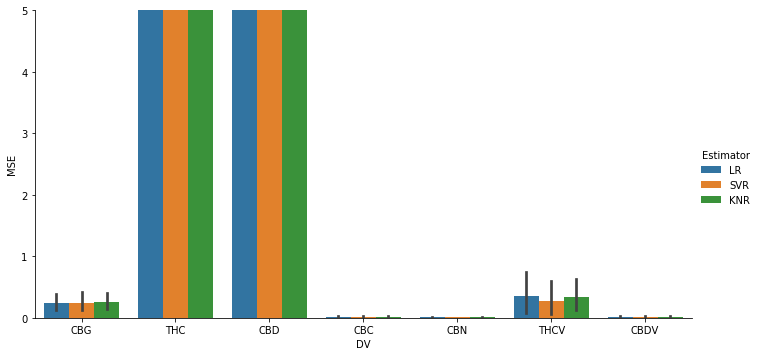

In [22]:
g = sb.catplot(x='DV', y='MSE', hue='Estimator', data=full_df_scores, 
               kind='bar', ci=95, hue_order = ['LR','SVR','KNR'], aspect = 2)
g.set(ylim=(0, 5))

# Interpolate missing data

Fill in the missing values using a variety of different imputation methods.

In [23]:
# Matrices to compute
X = comb_df.values
log_X = comb_df.apply(np.log).values


In [24]:
# Iterative imputation
X_filled_ii = IterativeImputer(n_nearest_features=5,min_value=0).fit_transform(X)
log_X_filled_ii = IterativeImputer(n_nearest_features=5).fit_transform(log_X)


/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/briankeegan/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [26]:
# Mutliple imputation, from: https://pypi.org/project/fancyimpute/

X_filled_mi_l = []
log_X_filled_mi_l = []

for i in range(5):
    imputer = IterativeImputer(sample_posterior=True, random_state=i)
    X_filled_mi_l.append(imputer.fit_transform(X))
    #log_X_filled_mi_l.append(imputer.fit_transform(log_X))

X_filled_mi = np.mean(X_filled_mi_l,0)
log_X_filled_mi = np.mean(log_X_filled_mi_l,0)
    

/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
# K-Nearest Neighbors
X_filled_knn = KNN(k=5,min_value=0,verbose=False).fit_transform(X)
log_X_filled_knn = KNN(k=5,verbose=False).fit_transform(log_X)


In [28]:
# Soft imputation
biscaler = BiScaler(center_rows=False,scale_rows=False,verbose=False)
X_normalized = biscaler.fit_transform(X)
X_filled_si = SoftImpute(verbose=False).fit_transform(X_normalized)
X_filled_si = biscaler.inverse_transform(X_filled_si)

log_biscaler = BiScaler(center_rows=False,scale_rows=False,verbose=False)
log_X_normalized = log_biscaler.fit_transform(log_X)
log_X_filled_si = SoftImpute(verbose=False).fit_transform(log_X_normalized)
log_X_filled_si = log_biscaler.inverse_transform(log_X_filled_si)


In [29]:
# Convert back to DataFrames
comb_ii_df = pd.DataFrame(X_filled_ii,index=comb_df.index,columns=comb_df.columns)
comb_mi_df = pd.DataFrame(X_filled_mi,index=comb_df.index,columns=comb_df.columns)
comb_knn_df = pd.DataFrame(X_filled_knn,index=comb_df.index,columns=comb_df.columns)
comb_si_df = pd.DataFrame(X_filled_si,index=comb_df.index,columns=comb_df.columns)

comb_ii_log_df = pd.DataFrame(log_X_filled_ii,index=comb_df.index,columns=comb_df.columns).apply(np.exp)
comb_mi_log_df = pd.DataFrame(log_X_filled_mi,index=comb_df.index,columns=comb_df.columns).apply(np.exp)
comb_knn_log_df = pd.DataFrame(log_X_filled_knn,index=comb_df.index,columns=comb_df.columns).apply(np.exp)
comb_si_log_df = pd.DataFrame(log_X_filled_si,index=comb_df.index,columns=comb_df.columns).apply(np.exp)


## Plot univariate distributions for interpolated data

Non-log-scaled data.

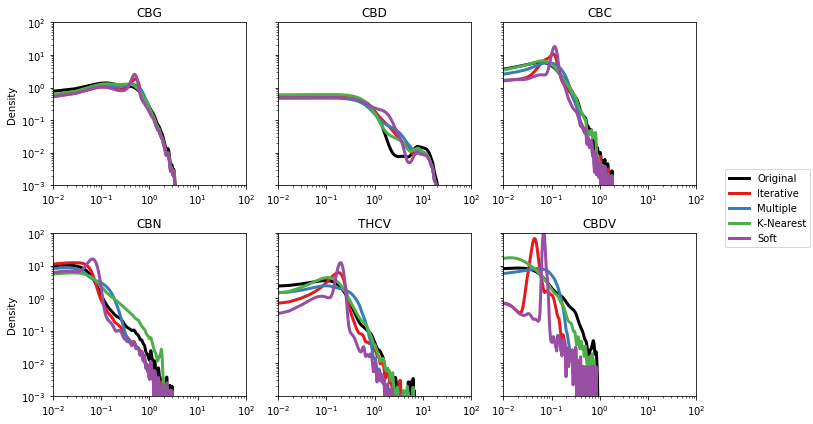

In [30]:
f,axs = plt.subplots(2,3,figsize=(10,6),sharey=True)

non_thc_cols = [col for col in comb_df.columns if col != 'THC']

for i,ax in enumerate(axs.reshape(-1)):
    col = non_thc_cols[i]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-2,1e2))
    ax.set_ylim((1e-3,1e2))
    ax.set_ylabel('')
    ax.set_title(col.upper())
    comb_df[col].plot(kind='kde',ax=ax,color='k',lw=3,label='Original')
    comb_ii_df[col].plot(kind='kde',ax=ax,color='#e41a1c',lw=3,label='Iterative')
    comb_mi_df[col].plot(kind='kde',ax=ax,color='#377eb8',lw=3,label='Multiple')
    comb_knn_df[col].plot(kind='kde',ax=ax,color='#4daf4a',lw=3,label='K-Nearest')
    comb_si_df[col].plot(kind='kde',ax=ax,color='#984ea3',lw=3,label='Soft')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
f.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1,.5))
f.tight_layout()
f.savefig('univariate_imputation.pdf',dpi=300,bbox_inches='tight')
f.savefig('univariate_imputation.png',dpi=300,bbox_inches='tight')

Test the distributions for differences.

In [31]:
for col in comb_df.columns:
    ii_ttest = stats.ttest_ind(comb_df[col].dropna(),comb_ii_df[col])
    mi_ttest = stats.ttest_ind(comb_df[col].dropna(),comb_mi_df[col])
    knn_ttest = stats.ttest_ind(comb_df[col].dropna(),comb_knn_df[col])
    si_ttest = stats.ttest_ind(comb_df[col].dropna(),comb_si_df[col])
    
    ii_kstest = stats.ks_2samp(comb_df[col].dropna(),comb_ii_df[col])
    mi_kstest = stats.ks_2samp(comb_df[col].dropna(),comb_mi_df[col])
    knn_kstest = stats.ks_2samp(comb_df[col].dropna(),comb_knn_df[col])
    si_kstest = stats.ks_2samp(comb_df[col].dropna(),comb_si_df[col])
    
    print("=== {0} ===".format(col.upper()))
    print("Iterative: t={0:.3f},p={1:.3f}".format(ii_ttest.statistic,ii_ttest.pvalue))
    print("Multiple: t={0:.3f},p={1:.3f}".format(mi_ttest.statistic,mi_ttest.pvalue))
    print("K-Nearest: t={0:.3f},p={1:.3f}".format(knn_ttest.statistic,knn_ttest.pvalue))
    print("Soft: t={0:.3f},p={1:.3f}\n".format(si_ttest.statistic,si_ttest.pvalue))
    
    print("Iterative: ks={0:.3f},p={1:.3f}".format(ii_kstest.statistic,ii_kstest.pvalue))
    print("Multiple: ks={0:.3f},p={1:.3f}".format(mi_kstest.statistic,mi_kstest.pvalue))
    print("K-Nearest: ks={0:.3f},p={1:.3f}".format(knn_kstest.statistic,knn_kstest.pvalue))
    print("Soft: ks={0:.3f},p={1:.3f}\n".format(si_kstest.statistic,si_kstest.pvalue))

=== CBG ===
Iterative: t=-2.944,p=0.003
Multiple: t=-0.644,p=0.519
K-Nearest: t=1.960,p=0.050
Soft: t=0.043,p=0.966

Iterative: ks=0.123,p=0.000
Multiple: ks=0.067,p=0.000
K-Nearest: ks=0.038,p=0.000
Soft: ks=0.155,p=0.000

=== THC ===
Iterative: t=0.820,p=0.412
Multiple: t=0.652,p=0.514
K-Nearest: t=0.609,p=0.542
Soft: t=0.304,p=0.761

Iterative: ks=0.006,p=0.918
Multiple: ks=0.005,p=0.981
K-Nearest: ks=0.004,p=1.000
Soft: ks=0.007,p=0.819

=== CBD ===
Iterative: t=4.411,p=0.000
Multiple: t=5.359,p=0.000
K-Nearest: t=3.519,p=0.000
Soft: t=1.716,p=0.086

Iterative: ks=0.147,p=0.000
Multiple: ks=0.145,p=0.000
K-Nearest: ks=0.120,p=0.000
Soft: ks=0.273,p=0.000

=== CBC ===
Iterative: t=2.257,p=0.024
Multiple: t=1.249,p=0.212
K-Nearest: t=0.809,p=0.419
Soft: t=0.378,p=0.706

Iterative: ks=0.200,p=0.000
Multiple: ks=0.112,p=0.000
K-Nearest: ks=0.025,p=0.004
Soft: ks=0.349,p=0.000

=== CBN ===
Iterative: t=8.654,p=0.000
Multiple: t=2.829,p=0.005
K-Nearest: t=-25.820,p=0.000
Soft: t=0.086,p=

Log-scaled data.

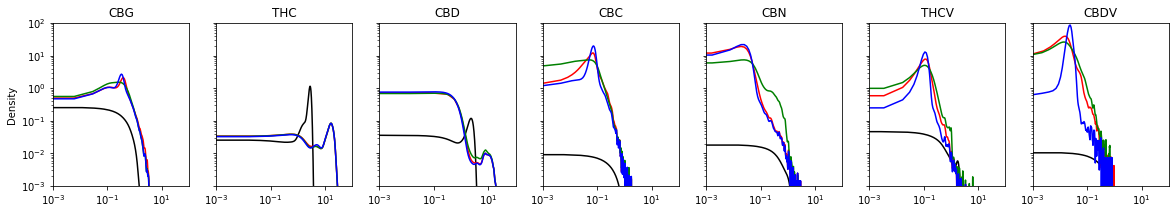

In [32]:
f,axs = plt.subplots(1,7,figsize=(20,3),sharey=True)

for i,col in enumerate(log_comb_df.columns):
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlim((1e-3,1e2))
    axs[i].set_ylim((1e-3,1e2))
    axs[i].set_ylabel('')
    axs[i].set_title(col)
    log_comb_df[col].plot(kind='kde',ax=axs[i],color='k')
    comb_ii_log_df[col].plot(kind='kde',ax=axs[i],color='r')
    comb_knn_log_df[col].plot(kind='kde',ax=axs[i],color='g')
    comb_si_log_df[col].plot(kind='kde',ax=axs[i],color='b')

## Plot bivariate distributions for interpolated data

Non-log-scaled data.

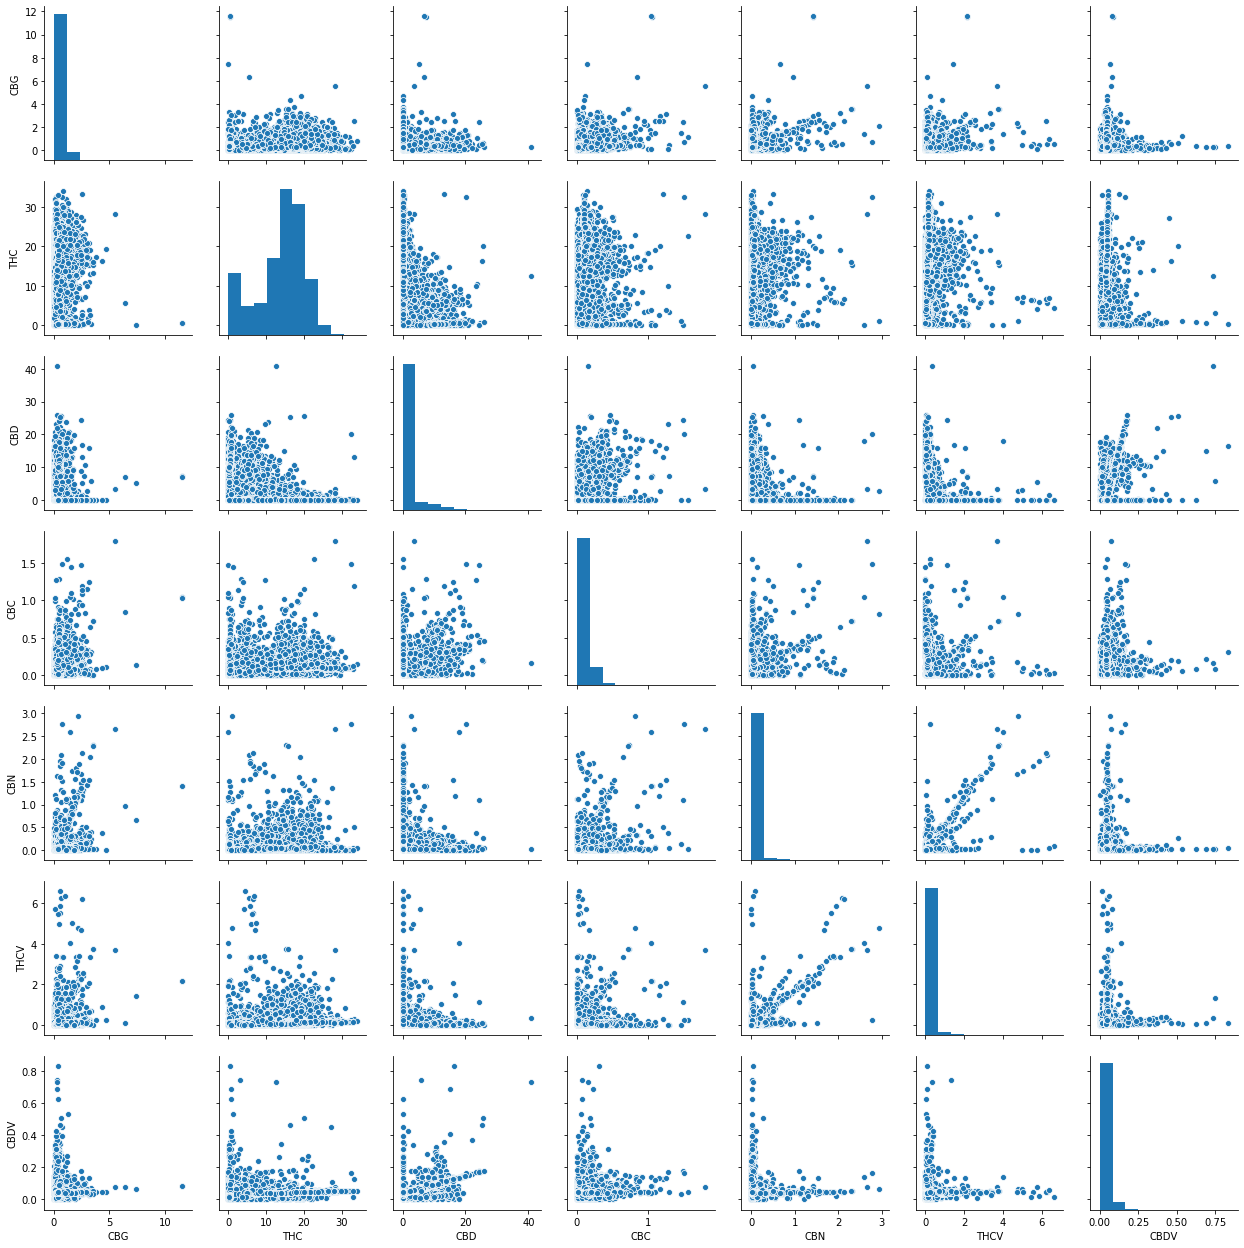

In [33]:
#X_ii = ss.fit_transform(comb_ii_df)

sb.pairplot(pd.DataFrame(data=comb_ii_df,columns=comb_ii_df.columns))

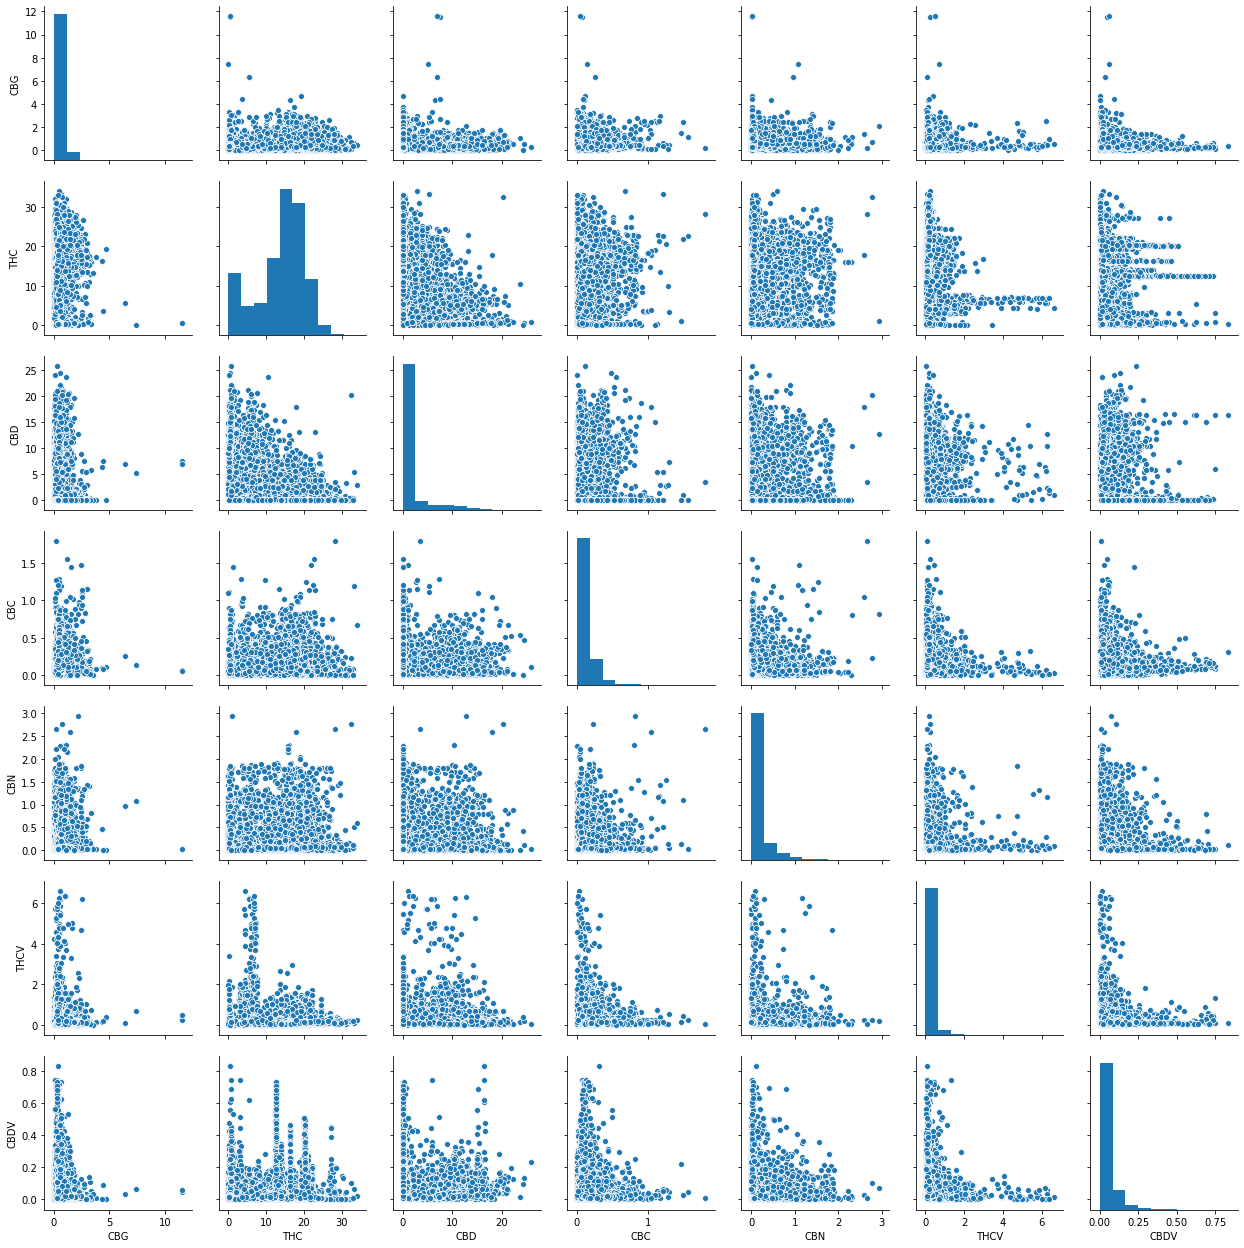

In [34]:
#X_knn = ss.fit_transform(comb_knn_df)

sb.pairplot(pd.DataFrame(data=comb_knn_df,columns=comb_knn_df.columns))

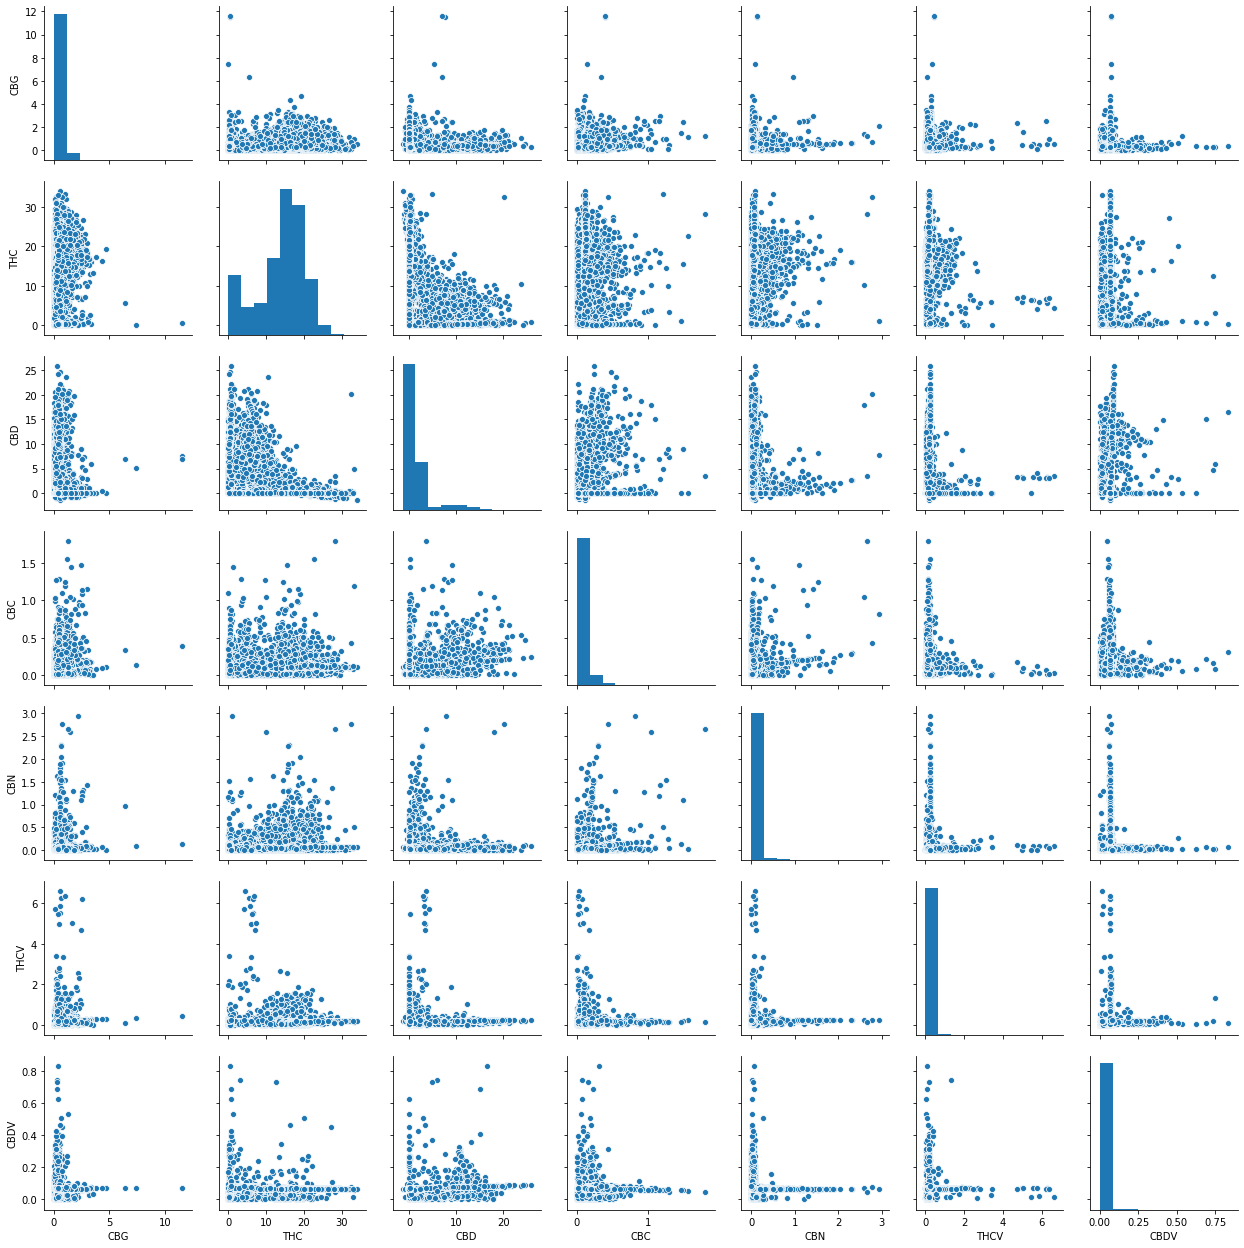

In [35]:
#X_si = ss.fit_transform(comb_si_df)

sb.pairplot(pd.DataFrame(data=comb_si_df,columns=comb_si_df.columns))

Log-scaled data.

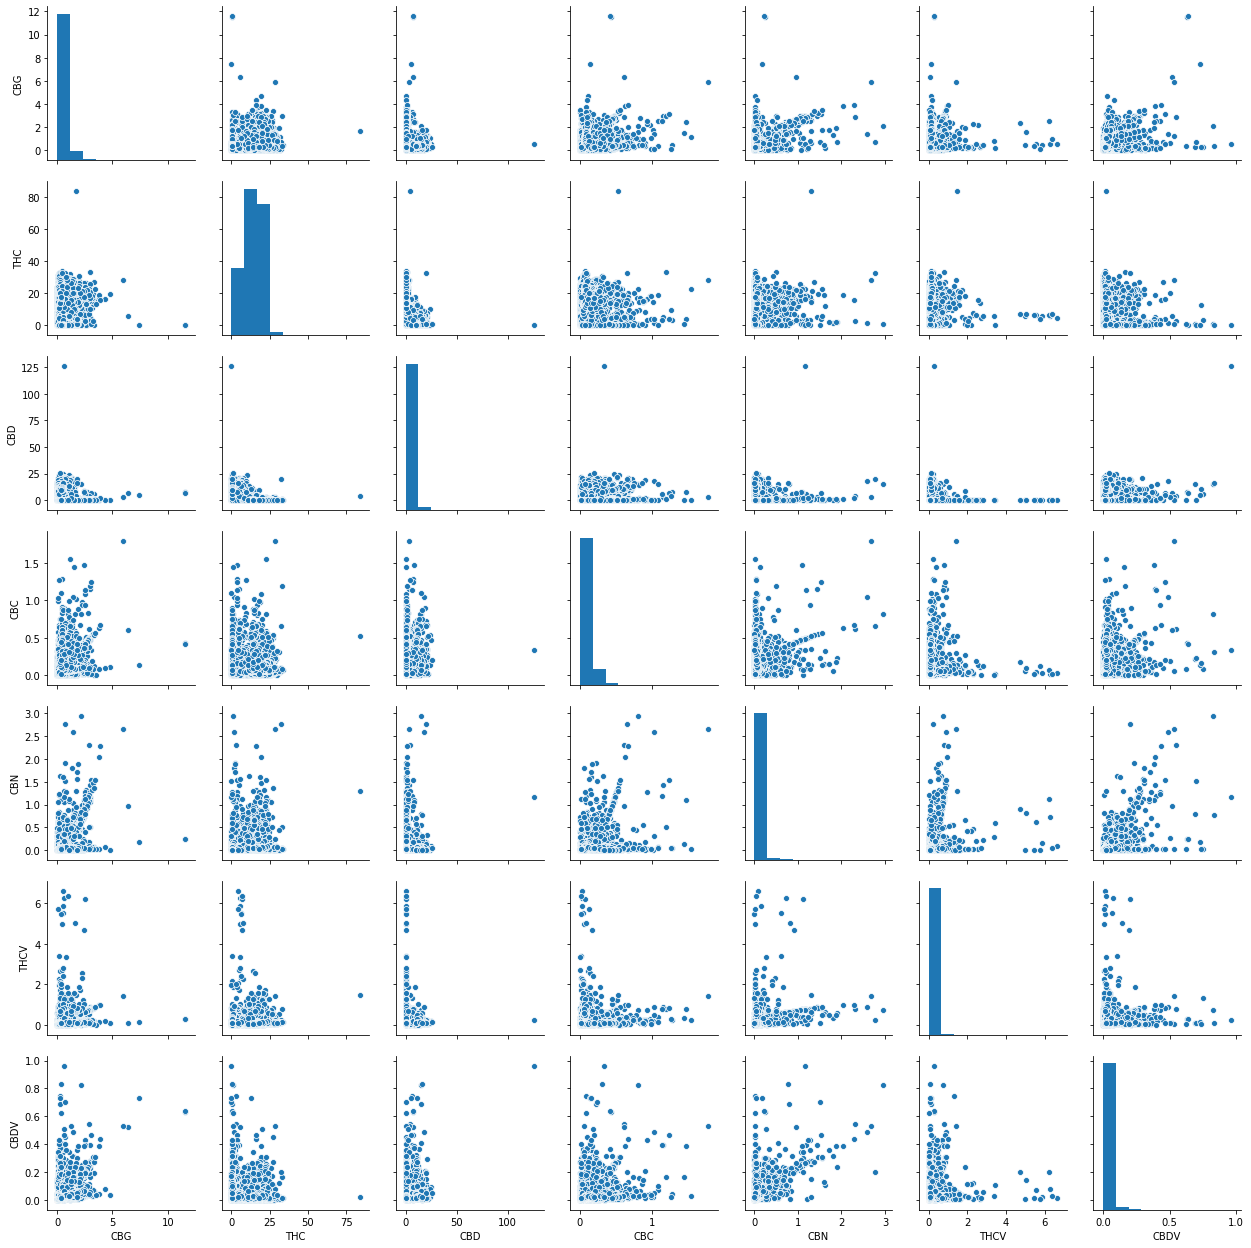

In [36]:
sb.pairplot(pd.DataFrame(data=comb_ii_log_df,columns=comb_ii_df.columns))

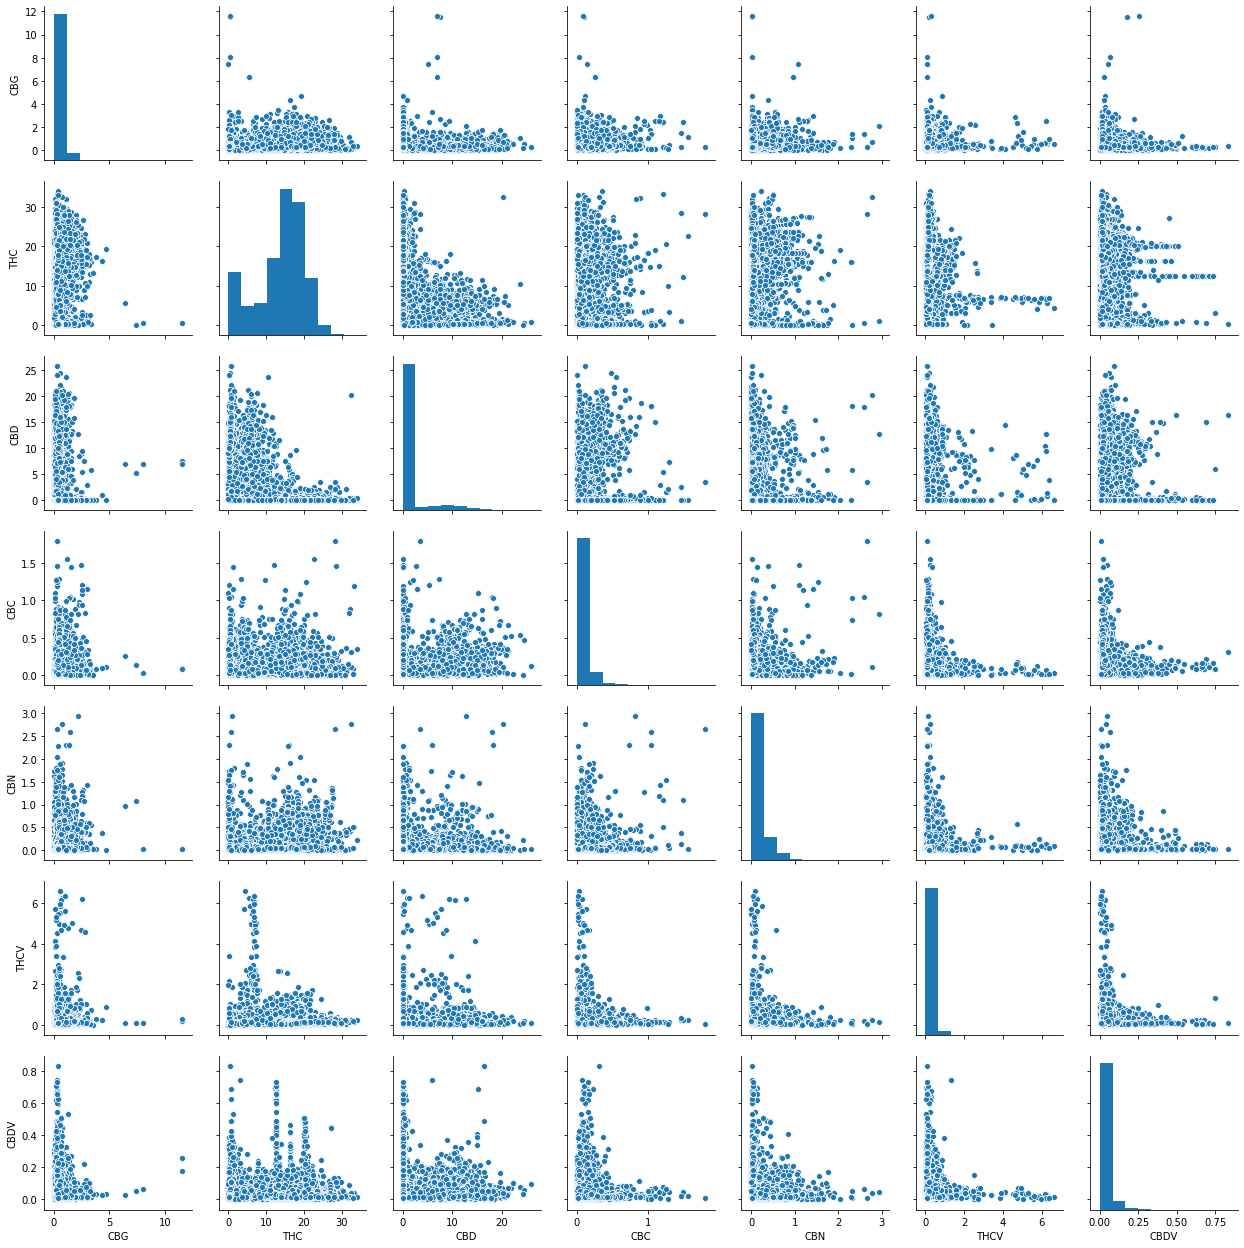

In [37]:
sb.pairplot(pd.DataFrame(data=comb_knn_log_df,columns=comb_ii_df.columns))

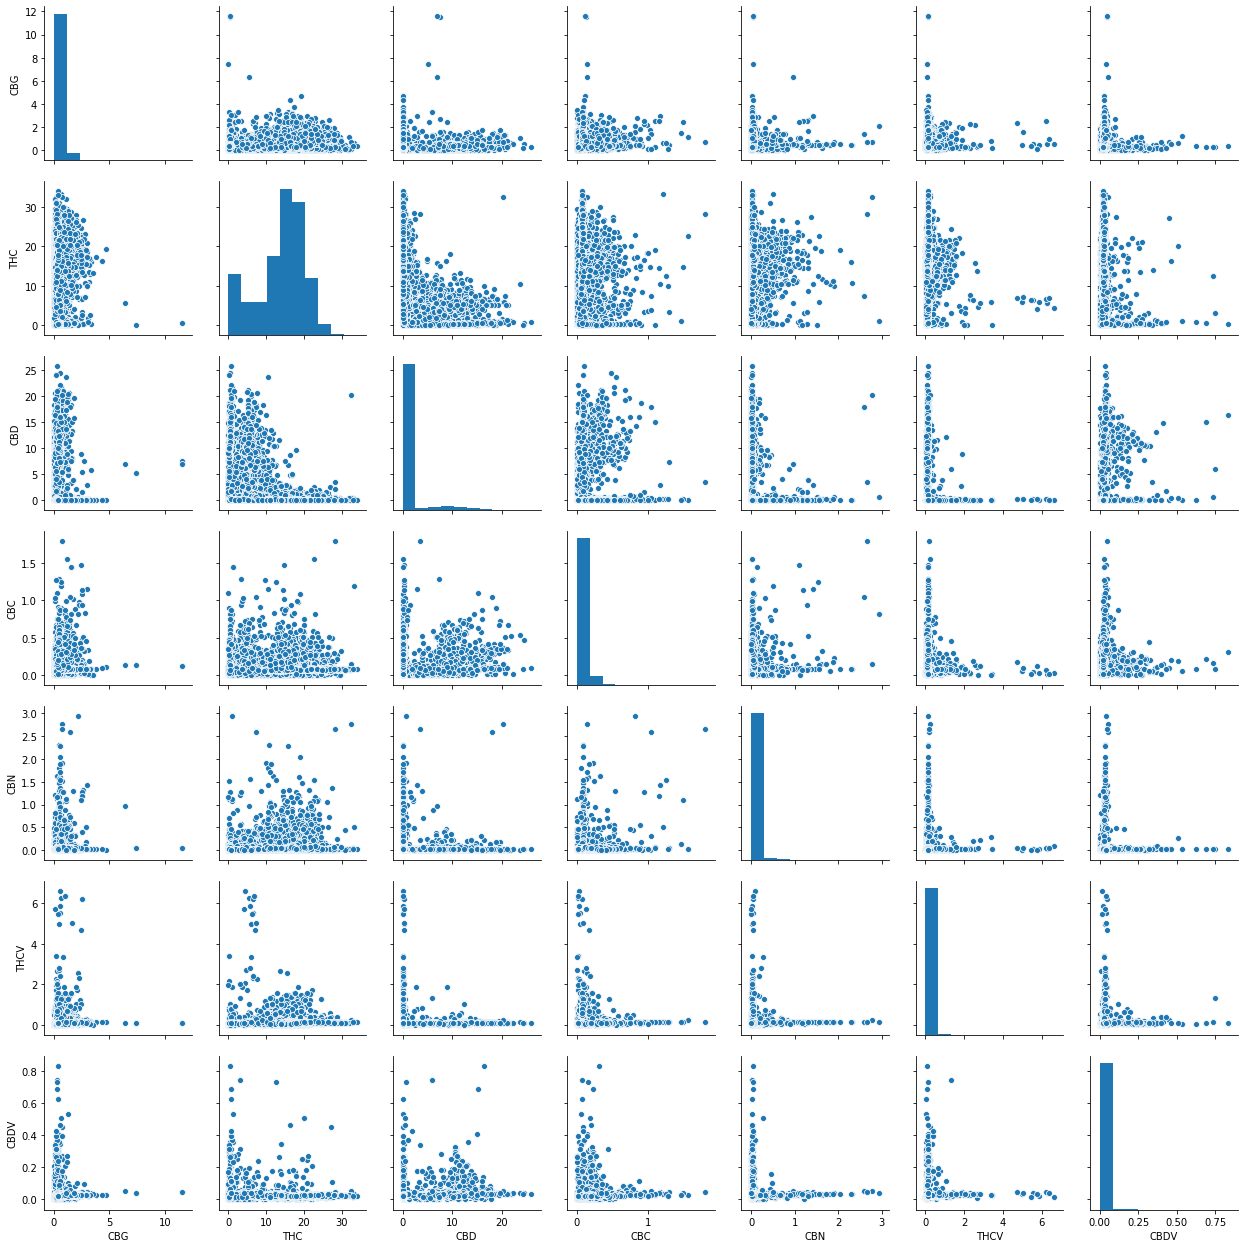

In [38]:
sb.pairplot(pd.DataFrame(data=comb_si_log_df,columns=comb_ii_df.columns))

## Compare correlations

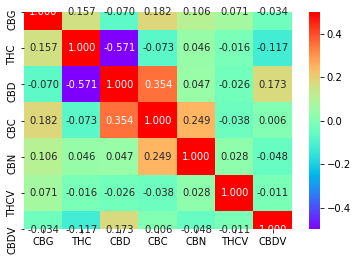

In [39]:
sb.heatmap(comb_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.5,vmax=.5)

In [40]:
import matplotlib.gridspec as gridspec

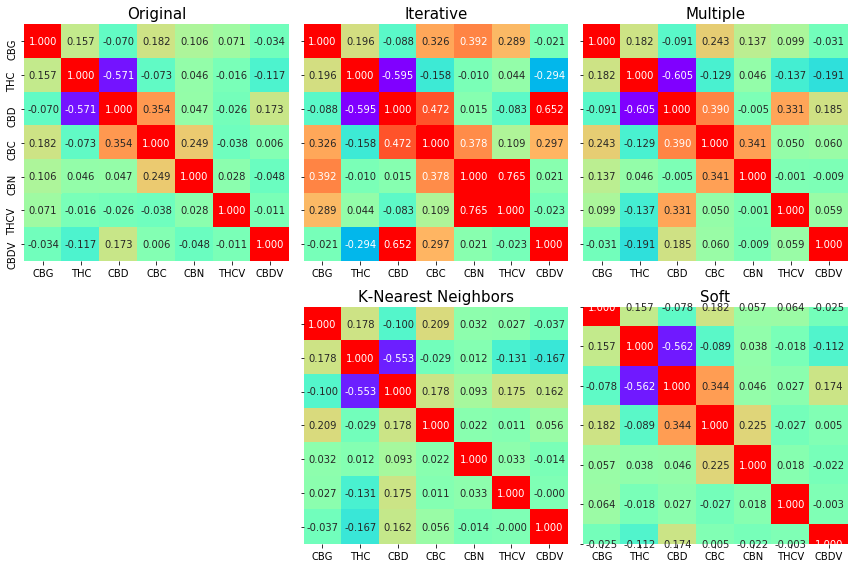

In [41]:
f,axs = plt.subplots(2,3,figsize=(12,8),sharey=True)

sb.heatmap(comb_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.6,vmax=.6,ax=axs[0][0],cbar=False)
sb.heatmap(comb_ii_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.6,vmax=.6,ax=axs[0][1],cbar=False)
sb.heatmap(comb_mi_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.6,vmax=.6,ax=axs[0][2],cbar=False)
sb.heatmap(comb_knn_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.6,vmax=.6,ax=axs[1][1],cbar=False)
sb.heatmap(comb_si_df.corr(),annot=True,fmt='.3f',cmap='rainbow',vmin=-.6,vmax=.6,ax=axs[1][2],cbar=False)

axs[0][0].set_title('Original',fontsize=15)
axs[0][1].set_title('Iterative',fontsize=15)
axs[0][2].set_title('Multiple',fontsize=15)
axs[1][1].set_title('K-Nearest Neighbors',fontsize=15)
axs[1][2].set_title('Soft',fontsize=15)

f.delaxes(axs[1][0])
f.tight_layout()
f.savefig('correlation_heatmaps.pdf',dpi=300)
f.savefig('correlation_heatmaps.png',dpi=300)


## Cluster data

In [42]:
cluster_colors1 = {-1:'#66c2a5',0:'#fc8d62',1:'#8da0cb',2:'#e78ac3',3:'#a6d854'}
cluster_colors2 = {-2:'#fdb462',-1:'#8dd3c7',0:'#bebada',1:'#fb8072',2:'#80b1d3',3:'#b3de69'}

10766


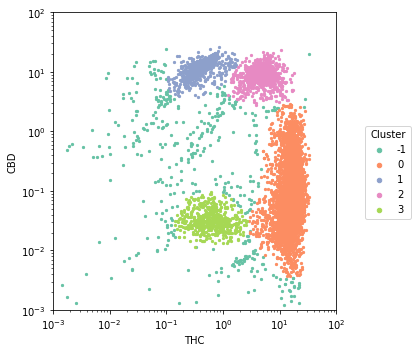

In [43]:
_x = 'THC'
_y = 'CBD'

_df = comb_df[[_x,_y]].dropna(how='any')

cbd_thc_dbscan = DBSCAN(min_samples=75,eps=.5)
cbd_thc_dbscale_clusters = cbd_thc_dbscan.fit_predict(_df.apply(np.log))
_df['cluster'] = cbd_thc_dbscale_clusters
print(len(_df))

f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('THC')
ax.set_ylabel('CBD')
ax.set_xlim((1e-3,1e2))
ax.set_ylim((1e-3,1e2))

groups = _df.groupby('cluster')

for n,g in groups:
    ax.scatter(g[_x],g[_y],s=5,label=n,color=cluster_colors1[n])
    
legend = f.legend(loc='center left',bbox_to_anchor=(1,.5))
legend.set_title('Cluster')
for l in legend.legendHandles:
    l._sizes = [20]

f.tight_layout()
f.savefig('thc_cbd_scatter.pdf',dpi=300,bbox_inches='tight')
f.savefig('thc_cbd_scatter.png',dpi=300,bbox_inches='tight')

In [44]:
_df['cluster'].value_counts().sort_index()

-1     433
 0    8270
 1     658
 2     869
 3     536
Name: cluster, dtype: int64

In [45]:
# Add back to master data list
comb_cluster_df = pd.merge(comb_df,_df[['cluster']],how='left',left_index=True,right_index=True)
comb_cluster_df.fillna(-2,inplace=True)
comb_cluster_df.shape


(17600, 8)

In [47]:
comb_df.head()

CBG        THC        CBD       CBC       CBN  THCV  CBDV
0       NaN   0.108568   0.015136  0.094400       NaN   NaN   NaN
1  0.490188  14.593210   0.199096  0.087608  0.239152   NaN   NaN
2  0.439788   0.759256  19.552888  0.410696  0.168700   NaN   NaN
3  0.512380   5.025926  13.644756  0.207460  0.007832   NaN   NaN
4  0.544332   7.374620   0.153700  0.036952  0.003432   NaN   NaN

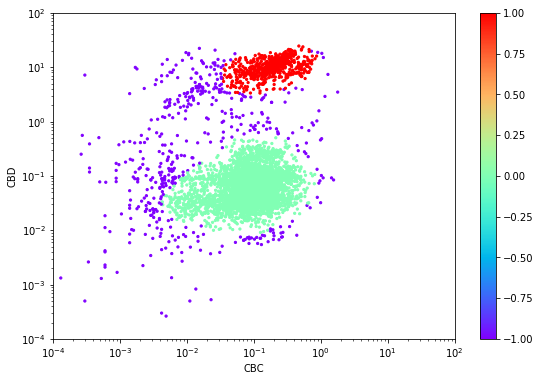

In [48]:
_x = 'CBC'
_y = 'CBD'
_df = comb_df[[_x,_y]].dropna(how='any')

cbd_thc_dbscan = DBSCAN(min_samples=75)

cbd_thc_clusters = cbd_thc_dbscan.fit_predict(_df.apply(np.log))

f,ax = plt.subplots(1,1,figsize=(9,6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((1e-4,1e2))
ax.set_ylim((1e-4,1e2))
_df.plot(x=_x,y=_y,kind='scatter',s=5,c=cbd_thc_clusters,ax=ax,cmap='rainbow')

## Compare imputed to true values

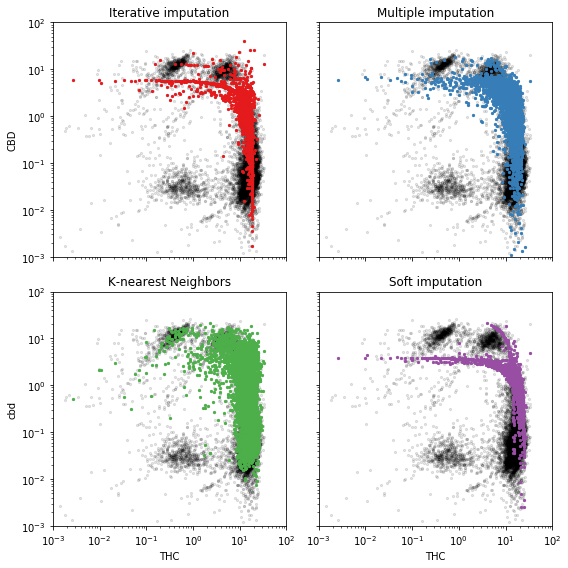

In [49]:
_x = 'THC'
_y = 'CBD'

# Plot only the missing values
missing_thc_cbd_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_df = comb_ii_df.reindex(missing_thc_cbd_ix)
imputed_mi_missing_df = comb_mi_df.reindex(missing_thc_cbd_ix)
imputed_knn_missing_df = comb_knn_df.reindex(missing_thc_cbd_ix)
imputed_si_missing_df = comb_si_df.reindex(missing_thc_cbd_ix)

# Create the plot environment
f,axs = plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)

# Create underlying distribution of THC and CBD relations
# comb_df.plot(x=_x,y=_y,ax=axs[0][0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[0][0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[0][1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1][0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1][1],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_df.plot(x=_x,y=_y,ax=axs[0][0],kind='scatter',c='#e41a1c',s=5,zorder=1)
imputed_mi_missing_df.plot(x=_x,y=_y,ax=axs[0][1],kind='scatter',c='#377eb8',s=5,zorder=1)
imputed_knn_missing_df.plot(x=_x,y=_y,ax=axs[1][0],kind='scatter',c='#4daf4a',s=5,zorder=1)
imputed_si_missing_df.plot(x=_x,y=_y,ax=axs[1][1],kind='scatter',c='#984ea3',s=5,zorder=1)

# Clean up plots
# axs[0][0].set_title('Raw')
axs[0][0].set_title('Iterative imputation')
axs[0][1].set_title('Multiple imputation')
axs[1][0].set_ylabel('cbd')
axs[1][0].set_title('K-nearest Neighbors')
axs[1][1].set_title('Soft imputation')

for axs1 in axs: 
    for ax2 in axs1: 
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_xlim((1e-3,1e2))
        ax2.set_ylim((1e-3,1e2))
    
# f.delaxes(axs[1][0])
f.tight_layout()
f.savefig('thc_cbd_interpolation.pdf',dpi=300)
f.savefig('thc_cbd_interpolation.png',dpi=300)


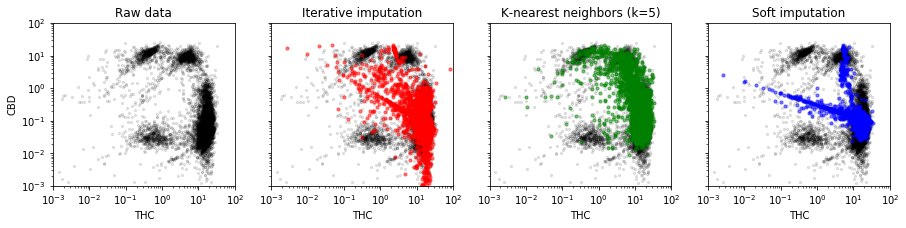

In [50]:
_x = 'THC'
_y = 'CBD'

# Plot only the missing values
missing_thc_cbd_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_log_df = comb_ii_log_df.reindex(missing_thc_cbd_ix)
imputed_knn_missing_log_df = comb_knn_log_df.reindex(missing_thc_cbd_ix)
imputed_si_missing_log_df = comb_si_log_df.reindex(missing_thc_cbd_ix)

# Create the plot environment
f,axs = plt.subplots(1,4,figsize=(15,3),sharey=True)

# Create underlying distribution of THC and CBD relations
comb_df.plot(x=_x,y=_y,ax=axs[0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_log_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='r',s=10,alpha=.5,zorder=1)
imputed_knn_missing_log_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='g',s=10,alpha=.5,zorder=1)
imputed_si_missing_log_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='b',s=10,alpha=.5,zorder=1)

# Clean up plots
axs[0].set_title('Raw data')
axs[1].set_title('Iterative imputation')
axs[2].set_title('K-nearest neighbors (k=5)')
axs[3].set_title('Soft imputation')

for ax in axs: 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-3,1e2))
    ax.set_ylim((1e-3,1e2))

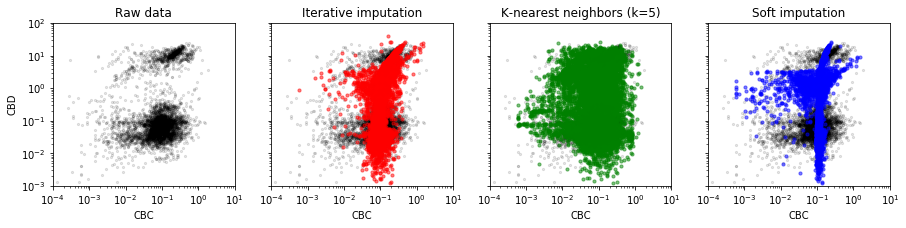

In [51]:
_x = 'CBC'
_y = 'CBD'

# Plot only the missing values
missing_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_df = comb_ii_df.reindex(missing_ix)
imputed_knn_missing_df = comb_knn_df.reindex(missing_ix)
imputed_si_missing_df = comb_si_df.reindex(missing_ix)

# Create the plot environment
f,axs = plt.subplots(1,4,figsize=(15,3),sharey=True)

# Create underlying distribution of THC and CBD relations
comb_df.plot(x=_x,y=_y,ax=axs[0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='r',s=10,alpha=.5,zorder=1)
imputed_knn_missing_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='g',s=10,alpha=.5,zorder=1)
imputed_si_missing_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='b',s=10,alpha=.5,zorder=1)

# Clean up plots
axs[0].set_title('Raw data')
axs[1].set_title('Iterative imputation')
axs[2].set_title('K-nearest neighbors (k=5)')
axs[3].set_title('Soft imputation')

for ax in axs: 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-4,1e1))
    ax.set_ylim((1e-3,1e2))

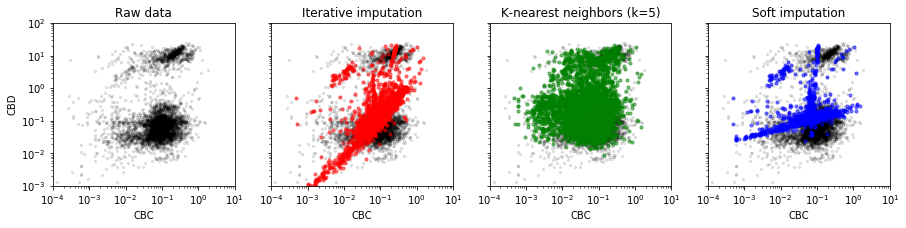

In [52]:
_x = 'CBC'
_y = 'CBD'

# Plot only the missing values
missing_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_df = comb_ii_df.reindex(missing_ix)
imputed_knn_missing_df = comb_knn_df.reindex(missing_ix)
imputed_si_missing_df = comb_si_df.reindex(missing_ix)

# Create the plot environment
f,axs = plt.subplots(1,4,figsize=(15,3),sharey=True)

# Create underlying distribution of THC and CBD relations
comb_df.plot(x=_x,y=_y,ax=axs[0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_log_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='r',s=10,alpha=.5,zorder=1)
imputed_knn_missing_log_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='g',s=10,alpha=.5,zorder=1)
imputed_si_missing_log_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='b',s=10,alpha=.5,zorder=1)

# Clean up plots
axs[0].set_title('Raw data')
axs[1].set_title('Iterative imputation')
axs[2].set_title('K-nearest neighbors (k=5)')
axs[3].set_title('Soft imputation')

for ax in axs: 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-4,1e1))
    ax.set_ylim((1e-3,1e2))

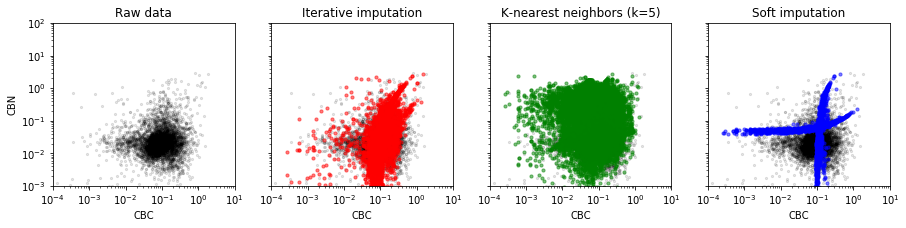

In [53]:
_x = 'CBC'
_y = 'CBN'

# Plot only the missing values
missing_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_df = comb_ii_df.reindex(missing_ix)
imputed_knn_missing_df = comb_knn_df.reindex(missing_ix)
imputed_si_missing_df = comb_si_df.reindex(missing_ix)

# Create the plot environment
f,axs = plt.subplots(1,4,figsize=(15,3),sharey=True)

# Create underlying distribution of THC and CBD relations
comb_df.plot(x=_x,y=_y,ax=axs[0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='r',s=10,alpha=.5,zorder=1)
imputed_knn_missing_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='g',s=10,alpha=.5,zorder=1)
imputed_si_missing_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='b',s=10,alpha=.5,zorder=1)

# Clean up plots
axs[0].set_title('Raw data')
axs[1].set_title('Iterative imputation')
axs[2].set_title('K-nearest neighbors (k=5)')
axs[3].set_title('Soft imputation')

for ax in axs: 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-4,1e1))
    ax.set_ylim((1e-3,1e2))

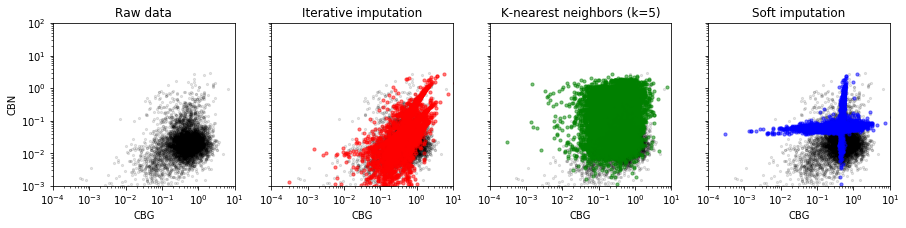

In [54]:
_x = 'CBG'
_y = 'CBN'

# Plot only the missing values
missing_ix = comb_df[np.any(comb_df[[_x,_y]].isnull(),1)].index

# Subset data to only missing rows
imputed_ii_missing_df = comb_ii_df.reindex(missing_ix)
imputed_knn_missing_df = comb_knn_df.reindex(missing_ix)
imputed_si_missing_df = comb_si_df.reindex(missing_ix)

# Create the plot environment
f,axs = plt.subplots(1,4,figsize=(15,3),sharey=True)

# Create underlying distribution of THC and CBD relations
comb_df.plot(x=_x,y=_y,ax=axs[0],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='k',s=5,alpha=.1)
comb_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='k',s=5,alpha=.1)

# Plot the interpolated data
imputed_ii_missing_df.plot(x=_x,y=_y,ax=axs[1],kind='scatter',c='r',s=10,alpha=.5,zorder=1)
imputed_knn_missing_df.plot(x=_x,y=_y,ax=axs[2],kind='scatter',c='g',s=10,alpha=.5,zorder=1)
imputed_si_missing_df.plot(x=_x,y=_y,ax=axs[3],kind='scatter',c='b',s=10,alpha=.5,zorder=1)

# Clean up plots
axs[0].set_title('Raw data')
axs[1].set_title('Iterative imputation')
axs[2].set_title('K-nearest neighbors (k=5)')
axs[3].set_title('Soft imputation')

for ax in axs: 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((1e-4,1e1))
    ax.set_ylim((1e-3,1e2))

## Visualize model embeddings

In [55]:
p = PCA(n_components=2)
u = UMAP(n_components=2, n_neighbors=10, random_state=42)
t = TSNE(n_components=2, perplexity=100, init='pca', random_state=42)

dbscan = DBSCAN(eps=.5,min_samples=50,n_jobs=-1)


Iterative.

In [70]:
# Dimensionality reduction
X_pca_ii = p.fit_transform(X_filled_ii)
X_umap_ii = u.fit_transform(X_filled_ii)
X_tsne_ii = t.fit_transform(X_filled_ii)

/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


Multiple imputation.

In [71]:
# Dimensionality reduction
X_pca_mi = p.fit_transform(X_filled_mi)
X_umap_mi = u.fit_transform(X_filled_mi)
X_tsne_mi = t.fit_transform(X_filled_mi)


/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


K-nearest neighbors.

In [72]:
# Dimensionality reduction
X_pca_knn = p.fit_transform(X_filled_knn)
X_umap_knn = u.fit_transform(X_filled_knn)
X_tsne_knn = t.fit_transform(X_filled_knn)


/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [73]:
# Clustering
y_dbscan_pca_knn_clusters = dbscan.fit_predict(X_pca_knn)
y_dbscan_umap_knn_clusters = dbscan.fit_predict(X_umap_knn)
y_dbscan_tsne_knn_clusters = dbscan.fit_predict(X_tsne_knn)


Soft imputation.

In [74]:
# Dimensionality reduction
X_pca_si = p.fit_transform(X_filled_si)
X_umap_si = u.fit_transform(X_filled_si)
X_tsne_si = t.fit_transform(X_filled_si)


/Users/briankeegan/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [75]:
# Clustering

y_dbscan_pca_si_clusters = dbscan.fit_predict(X_pca_si)
y_dbscan_umap_si_clusters = dbscan.fit_predict(X_umap_si)
y_dbscan_tsne_si_clusters = dbscan.fit_predict(X_tsne_si)


In [76]:
dimred_df = comb_cluster_df.copy()

cluster_d = {-2:'Imputed',
             -1:'Unclassified',
             0:'High THC, Low CBD',
             1:'Low THC, High CBD',
             2:'High THC, High CBD',
             3:'Low THC, Low CBD'}

cluster_name_colors = {'Imputed': '#fdb462',
                       'Unclassified': '#8dd3c7',
                       'High THC, Low CBD': '#bebada',
                       'Low THC, High CBD': '#fb8072',
                       'High THC, High CBD': '#80b1d3',
                       'Low THC, Low CBD': '#b3de69'}

dimred_df['cluster_name'] = dimred_df['cluster'].map(cluster_d)

# PCA
dimred_df['pca_ii_x'] = X_pca_ii[:, 0]
dimred_df['pca_ii_y'] = X_pca_ii[:, 1]
dimred_df['pca_mi_x'] = X_pca_mi[:, 0]
dimred_df['pca_mi_y'] = X_pca_mi[:, 1]
dimred_df['pca_knn_x'] = X_pca_knn[:, 0]
dimred_df['pca_knn_y'] = X_pca_knn[:, 1]
dimred_df['pca_si_x'] = X_pca_si[:, 0]
dimred_df['pca_si_y'] = X_pca_si[:, 1]

# UMAP
dimred_df['umap_ii_x'] = X_umap_ii[:, 0]
dimred_df['umap_ii_y'] = X_umap_ii[:, 1]
dimred_df['umap_mi_x'] = X_umap_mi[:, 0]
dimred_df['umap_mi_y'] = X_umap_mi[:, 1]
dimred_df['umap_knn_x'] = X_umap_knn[:, 0]
dimred_df['umap_knn_y'] = X_umap_knn[:, 1]
dimred_df['umap_si_x'] = X_umap_si[:, 0]
dimred_df['umap_si_y'] = X_umap_si[:, 1]

# t-SNE
dimred_df['tsne_ii_x'] = X_tsne_ii[:, 0]
dimred_df['tsne_ii_y'] = X_tsne_ii[:, 1]
dimred_df['tsne_mi_x'] = X_tsne_mi[:, 0]
dimred_df['tsne_mi_y'] = X_tsne_mi[:, 1]
dimred_df['tsne_knn_x'] = X_tsne_knn[:, 0]
dimred_df['tsne_knn_y'] = X_tsne_knn[:, 1]
dimred_df['tsne_si_x'] = X_tsne_si[:, 0]
dimred_df['tsne_si_y'] = X_tsne_si[:, 1]

dimred_groups = dimred_df.groupby('cluster_name')

dimred_df.head()

CBG        THC        CBD       CBC       CBN  THCV  CBDV  cluster  \
0 -2.000000   0.108568   0.015136  0.094400 -2.000000  -2.0  -2.0     -1.0   
1  0.490188  14.593210   0.199096  0.087608  0.239152  -2.0  -2.0      0.0   
2  0.439788   0.759256  19.552888  0.410696  0.168700  -2.0  -2.0      1.0   
3  0.512380   5.025926  13.644756  0.207460  0.007832  -2.0  -2.0      2.0   
4  0.544332   7.374620   0.153700  0.036952  0.003432  -2.0  -2.0      0.0   

         cluster_name   pca_ii_x   pca_ii_y   pca_mi_x   pca_mi_y  pca_knn_x  \
0        Unclassified  12.593096  -6.013306  12.494856  -6.235455  12.611020   
1   High THC, Low CBD  -1.004005  -1.017941  -0.994646  -0.946329  -0.998400   
2   Low THC, High CBD  18.487305  12.628189  18.764473  12.302821  18.446659   
3  High THC, High CBD  12.495576   8.477318  12.690825   8.270720  12.472202   
4   High THC, Low CBD   5.786673  -3.462230   5.740671  -3.549387   5.799314   

   pca_knn_y   pca_si_x   pca_si_y  umap_ii_x  umap_ii_y  umap_mi_x  \
0  -6.014343  12.754380  -5.779974  11.979042  -7.332328   9.030688   
1  -1.055804  -0.976735  -1.165017  -2.286028  10.867410  -4.075298   
2  12.643247  18.123692  13.019392   2.631840  -7.521320  11.698612   
3   8.479093  12.250833   8.701150   4.170959  -6.118091  10.832559   
4  -3.484436   5.879737  -3.421580  11.149542   2.629748   5.075274   

   umap_mi_y  umap_knn_x  umap_knn_y  umap_si_x  umap_si_y  tsne_ii_x  \
0  -9.612767  -12.704706   -7.166282 -11.359303  10.806378  72.314659   
1   8.042050    3.196095    9.716156   3.521115 -10.529644   6.361779   
2   6.778327   -3.428454   -7.561798  -5.218018   6.985097  58.226875   
3   3.519505   -5.090904   -3.126715  -6.113907   5.162903  32.269737   
4  -1.040322   -9.844050    2.540734 -11.325983  -3.865688  47.000900   

   tsne_ii_y  tsne_mi_x  tsne_mi_y  tsne_knn_x  tsne_knn_y  tsne_si_x  \
0 -23.536106  64.724846 -34.540455   72.700974  -15.823501  66.558769   
1 -38.448215   0.843288 -44.171429    4.326826  -31.003448   7.020136   
2  45.082516  54.544601  47.094933   54.264545   54.521355  57.301811   
3  49.620922  43.863678  34.500370   33.397320   43.666321  34.661617   
4  -7.520128  49.644409  -7.245146   48.884209   -2.216467  42.965397   

   tsne_si_y  
0 -24.376753  
1 -13.300872  
2  45.914429  
3  46.082859  
4 -35.925518

In [77]:
cluster_colors2

{-2: '#fdb462',
 -1: '#8dd3c7',
 0: '#bebada',
 1: '#fb8072',
 2: '#80b1d3',
 3: '#b3de69'}

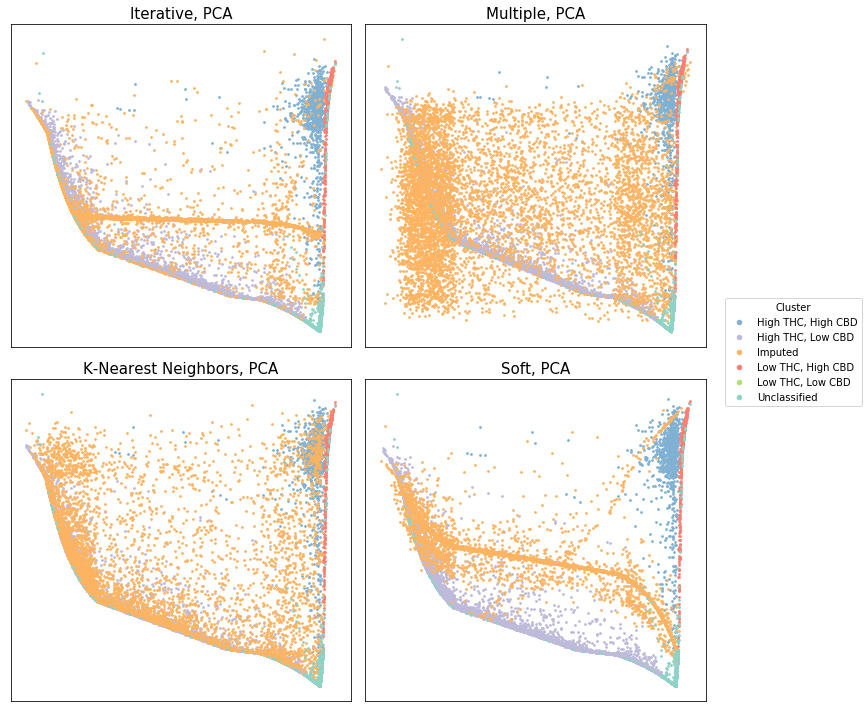

In [78]:
# Visualize
f,axs = plt.subplots(2,2,figsize=(10,10))

# axs[0].scatter(X_pca_ii[:, 0], X_pca_ii[:, 1], c=y_dbscan_pca_ii_clusters, s=3, cmap='rainbow')
# axs[1].scatter(X_pca_knn[:, 0], X_pca_knn[:, 1], c=y_dbscan_pca_knn_clusters, s=3, cmap='rainbow')
# axs[2].scatter(X_pca_si[:, 0], X_pca_si[:, 1], c=y_dbscan_pca_si_clusters, s=3, cmap='rainbow')

thc_cbd_clusters = comb_cluster_df['cluster'].values

for n,d in dimred_groups:
    axs[0][0].scatter(d['pca_ii_x'], d['pca_ii_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[0][1].scatter(d['pca_mi_x'], d['pca_mi_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][0].scatter(d['pca_knn_x'], d['pca_knn_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][1].scatter(d['pca_si_x'], d['pca_si_y'], s=3, label=n, color=cluster_name_colors[n])

axs[0][0].set_title('Iterative, PCA',fontsize=15)
axs[0][1].set_title('Multiple, PCA',fontsize=15)
axs[1][0].set_title('K-Nearest Neighbors, PCA',fontsize=15)
axs[1][1].set_title('Soft, PCA',fontsize=15)

for ax in axs.reshape(-1):
    ax.grid(None)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = f.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1,.5))

legend.set_title('Cluster')
for l in legend.legendHandles:
    l._sizes = [20]

f.tight_layout()
f.savefig('dimred_pca.pdf',dpi=300,bbox_inches='tight')
f.savefig('dimred_pca.png',dpi=300,bbox_inches='tight')

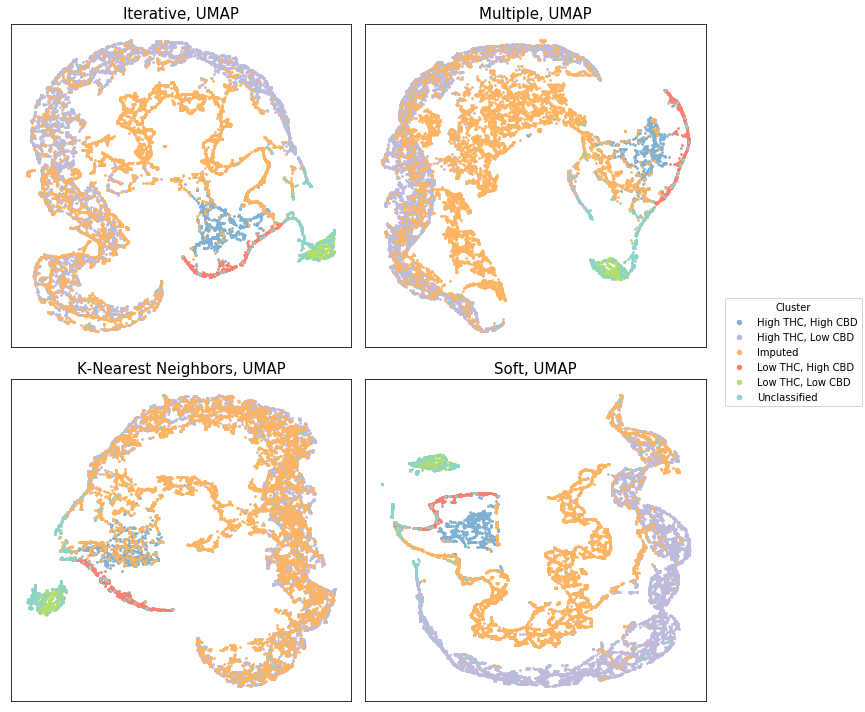

In [79]:
# Visualize
f,axs = plt.subplots(2,2,figsize=(10,10))

# axs[0].scatter(X_umap_ii[:, 0], X_umap_ii[:, 1], c=y_dbscan_umap_ii_clusters, s=3, cmap='rainbow')
# axs[1].scatter(X_umap_knn[:, 0], X_umap_knn[:, 1], c=y_dbscan_umap_knn_clusters, s=3, cmap='rainbow')
# axs[2].scatter(X_umap_si[:, 0], X_umap_si[:, 1], c=y_dbscan_umap_si_clusters, s=3, cmap='rainbow')

thc_cbd_clusters = comb_cluster_df['cluster'].values

for n,d in dimred_groups:
    axs[0][0].scatter(d['umap_ii_x'], d['umap_ii_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[0][1].scatter(d['umap_mi_x'], d['umap_mi_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][0].scatter(d['umap_knn_x'], d['umap_knn_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][1].scatter(d['umap_si_x'], d['umap_si_y'], s=3, label=n, color=cluster_name_colors[n])

axs[0][0].set_title('Iterative, UMAP',fontsize=15)
axs[0][1].set_title('Multiple, UMAP',fontsize=15)
axs[1][0].set_title('K-Nearest Neighbors, UMAP',fontsize=15)
axs[1][1].set_title('Soft, UMAP',fontsize=15)

for ax in axs.reshape(-1):
    ax.grid(None)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #ax.set_xscale('symlog')
    #ax.set_yscale('symlog')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = f.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1,.5))

legend.set_title('Cluster')
for l in legend.legendHandles:
    l._sizes = [20]

f.tight_layout()
f.savefig('dimred_umap.pdf',dpi=300,bbox_inches='tight')
f.savefig('dimred_umap.png',dpi=300,bbox_inches='tight')

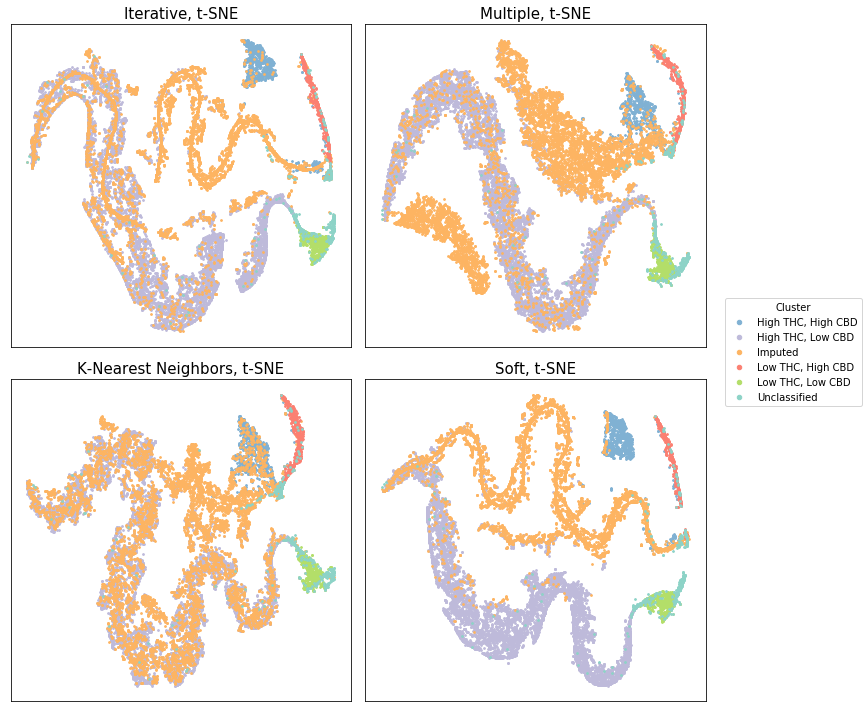

In [82]:
# Visualize
f,axs = plt.subplots(2,2,figsize=(10,10))

# axs[0].scatter(X_tsne_ii[:, 0], X_tsne_ii[:, 1], c=y_dbscan_tsne_ii_clusters, s=3, cmap='rainbow')
# axs[1].scatter(X_tsne_knn[:, 0], X_tsne_knn[:, 1], c=y_dbscan_tsne_knn_clusters, s=3, cmap='rainbow')
# axs[2].scatter(X_tsne_si[:, 0], X_tsne_si[:, 1], c=y_dbscan_tsne_si_clusters, s=3, cmap='rainbow')

thc_cbd_clusters = comb_cluster_df['cluster'].values

for n,d in dimred_groups:
    axs[0][0].scatter(d['tsne_ii_x'], d['tsne_ii_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[0][1].scatter(d['tsne_mi_x'], d['tsne_mi_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][0].scatter(d['tsne_knn_x'], d['tsne_knn_y'], s=3, label=n, color=cluster_name_colors[n])
    axs[1][1].scatter(d['tsne_si_x'], d['tsne_si_y'], s=3, label=n, color=cluster_name_colors[n])

axs[0][0].set_title('Iterative, t-SNE',fontsize=15)
axs[0][1].set_title('Multiple, t-SNE',fontsize=15)
axs[1][0].set_title('K-Nearest Neighbors, t-SNE',fontsize=15)
axs[1][1].set_title('Soft, t-SNE',fontsize=15)

for ax in axs.reshape(-1):
    ax.grid(None)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #ax.set_xscale('symlog')
    #ax.set_yscale('symlog')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = f.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1,.5))

legend.set_title('Cluster')
for l in legend.legendHandles:
    l._sizes = [20]

f.tight_layout()
f.savefig('dimred_tsne.pdf',dpi=300,bbox_inches='tight')

## Compare model performance

### Linear regression

`IterativeImputer` values.

In [83]:
lr_ii_cv_scores = {}
lr_ii_models = {}
for var in comb_ii_df.columns:
    
    # Choose estimator
    lr = LinearRegression()

    # Make the variables
    y = comb_ii_df[var].values.reshape(-1,1)
    X = comb_ii_df[[col for col in comb_ii_df.columns if col != var]].values

    # Fit the model
    lr_full = lr.fit(X,y)
    lr_ii_models[var] = lr_full

    # Evaluate performance
    lr_score = lr_ii_models[var].score(X,y)
    lr_ii_cv_scores[var] = np.abs(cross_val_score(lr,X,y,cv=5,scoring='r2')) # This makes no sense?
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(lr_score))
    print("5x CV R2: {0:.3}\n".format(lr_ii_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.258
5x CV R2: 0.249

=== THC ===
Full R2: 0.407
5x CV R2: 0.395

=== CBD ===
Full R2: 0.688
5x CV R2: 0.626

=== CBC ===
Full R2: 0.475
5x CV R2: 0.489

=== CBN ===
Full R2: 0.687
5x CV R2: 0.599

=== THCV ===
Full R2: 0.625
5x CV R2: 0.675

=== CBDV ===
Full R2: 0.442
5x CV R2: 0.561



Multiple imputation values.

In [84]:
lr_mi_cv_scores = {}
lr_mi_models = {}
for var in comb_mi_df.columns:
    
    # Choose estimator
    lr = LinearRegression()

    # Make the variables
    y = comb_mi_df[var].values.reshape(-1,1)
    X = comb_mi_df[[col for col in comb_ii_df.columns if col != var]].values

    # Fit the model
    lr_full = lr.fit(X,y)
    lr_mi_models[var] = lr_full

    # Evaluate performance
    lr_score = lr_mi_models[var].score(X,y)
    lr_mi_cv_scores[var] = np.abs(cross_val_score(lr,X,y,cv=5,scoring='r2')) # This makes no sense?
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(lr_score))
    print("5x CV R2: {0:.3}\n".format(lr_mi_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.137
5x CV R2: 0.0962

=== THC ===
Full R2: 0.399
5x CV R2: 0.398

=== CBD ===
Full R2: 0.543
5x CV R2: 0.468

=== CBC ===
Full R2: 0.346
5x CV R2: 0.352

=== CBN ===
Full R2: 0.14
5x CV R2: 0.176

=== THCV ===
Full R2: 0.15
5x CV R2: 0.155

=== CBDV ===
Full R2: 0.0441
5x CV R2: 0.0424



`KNearestNeighbors` values.

In [85]:
lr_knn_cv_scores = {}
lr_knn_models = {}
for var in comb_knn_df.columns:
    
    # Choose estimator
    lr = LinearRegression()

    # Make the variables
    y = comb_knn_df[var].values.reshape(-1,1)
    X = comb_knn_df[[col for col in comb_knn_df.columns if col != var]].values

    # Fit the model
    lr_full = lr.fit(X,y)
    lr_knn_models[var] = lr_full

    # Evaluate performance
    lr_score = lr_knn_models[var].score(X,y)
    lr_knn_cv_scores[var] = np.abs(cross_val_score(lr,X,y,cv=5,scoring='r2')) # This makes no sense?
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(lr_score))
    print("5x CV R2: {0:.3}\n".format(lr_knn_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.0835
5x CV R2: 0.047

=== THC ===
Full R2: 0.333
5x CV R2: 0.324

=== CBD ===
Full R2: 0.357
5x CV R2: 0.389

=== CBC ===
Full R2: 0.088
5x CV R2: 0.0772

=== CBN ===
Full R2: 0.0162
5x CV R2: 0.0129

=== THCV ===
Full R2: 0.037
5x CV R2: 0.0366

=== CBDV ===
Full R2: 0.0377
5x CV R2: 0.0184



`SoftImputer` values.

In [86]:
lr_si_cv_scores = {}
lr_si_models = {}
for var in comb_si_df.columns:
    
    # Choose estimator
    lr = LinearRegression()

    # Make the variables
    y = comb_si_df[var].values.reshape(-1,1)
    X = comb_si_df[[col for col in comb_ii_df.columns if col != var]].values

    # Fit the model
    lr_full = lr.fit(X,y)
    lr_si_models[var] = lr_full

    # Evaluate performance
    lr_score = lr_si_models[var].score(X,y)
    lr_si_cv_scores[var] = np.abs(cross_val_score(lr,X,y,cv=10,scoring='r2')) # This makes no sense?
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(lr_score))
    print("5x CV R2: {0:.3}\n".format(lr_si_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.0729
5x CV R2: 0.132

=== THC ===
Full R2: 0.338
5x CV R2: 0.345

=== CBD ===
Full R2: 0.419
5x CV R2: 0.393

=== CBC ===
Full R2: 0.213
5x CV R2: 0.171

=== CBN ===
Full R2: 0.0548
5x CV R2: 0.134

=== THCV ===
Full R2: 0.00889
5x CV R2: 0.033

=== CBDV ===
Full R2: 0.0341
5x CV R2: 0.289



In [87]:
_i = pd.DataFrame.from_dict(lr_ii_cv_scores).T.mean(1)
_m = pd.DataFrame.from_dict(lr_mi_cv_scores).T.mean(1)
_k = pd.DataFrame.from_dict(lr_knn_cv_scores).T.mean(1)
_s = pd.DataFrame.from_dict(lr_si_cv_scores).T.mean(1)

lr_r2 = pd.DataFrame({'I':_i,'M':_m,'K':_k,'S':_s})#.style.format("{:.3f}")
lr_r2

I         M         K         S
CBG   0.248501  0.096151  0.046975  0.131618
THC   0.394696  0.398068  0.323723  0.345439
CBD   0.625546  0.467634  0.388654  0.393309
CBC   0.488637  0.352331  0.077219  0.171388
CBN   0.598851  0.175936  0.012926  0.133969
THCV  0.674604  0.154787  0.036631  0.032953
CBDV  0.561258  0.042386  0.018442  0.288987

### Support vector regression

In [88]:
svr_ii_cv_scores = {}
svr_ii_models = {}


for var in comb_ii_df.columns:
    
    # Choose estimator
    svr = SVR(gamma='auto')

    # Make the variables
    y = comb_ii_df[var].values.reshape(-1,1)
    X = comb_ii_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y).ravel()
    X = StandardScaler().fit_transform(X)

    # Fit the model
    svr_ii_models[var] = svr.fit(X,y)

    # Evaluate performance
    svr_score = svr_ii_models[var].score(X,y)
    svr_ii_cv_scores[var] = np.abs(cross_val_score(svr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(svr_score))
    print("5x CV R2: {0:.3}\n".format(svr_ii_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.396
5x CV R2: 0.333

=== THC ===
Full R2: 0.839
5x CV R2: 0.791

=== CBD ===
Full R2: 0.896
5x CV R2: 0.807

=== CBC ===
Full R2: 0.586
5x CV R2: 0.475

=== CBN ===
Full R2: 0.618
5x CV R2: 0.477

=== THCV ===
Full R2: 0.486
5x CV R2: 0.445

=== CBDV ===
Full R2: 0.429
5x CV R2: 0.523



In [89]:
svr_mi_cv_scores = {}
svr_mi_models = {}

for var in comb_ii_df.columns:
    
    # Choose estimator
    svr = SVR(gamma='auto')

    # Make the variables
    y = comb_mi_df[var].values.reshape(-1,1)
    X = comb_mi_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y).ravel()
    X = StandardScaler().fit_transform(X)

    # Fit the model
    svr_mi_models[var] = svr.fit(X,y)

    # Evaluate performance
    svr_score = svr_mi_models[var].score(X,y)
    svr_mi_cv_scores[var] = np.abs(cross_val_score(svr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(svr_score))
    print("5x CV R2: {0:.3}\n".format(svr_mi_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.171
5x CV R2: 0.0832

=== THC ===
Full R2: 0.464
5x CV R2: 0.43

=== CBD ===
Full R2: 0.747
5x CV R2: 0.638

=== CBC ===
Full R2: 0.341
5x CV R2: 0.293

=== CBN ===
Full R2: 0.102
5x CV R2: 0.0404

=== THCV ===
Full R2: 0.166
5x CV R2: 0.122

=== CBDV ===
Full R2: 0.0659
5x CV R2: 0.023



In [90]:
svr_knn_cv_scores = {}
svr_knn_models = {}

for var in comb_knn_df.columns:
    
    # Choose estimator
    svr = SVR(gamma='auto')

    # Make the variables
    y = comb_knn_df[var].values.reshape(-1,1)
    X = comb_knn_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y).ravel()
    X = StandardScaler().fit_transform(X)

    # Fit the model
    svr_knn_models[var] = svr.fit(X,y)

    # Evaluate performance
    svr_score = svr_knn_models[var].score(X,y)
    svr_knn_cv_scores[var] = np.abs(cross_val_score(svr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(svr_score))
    print("5x CV R2: {0:.3}\n".format(svr_knn_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.145
5x CV R2: 0.118

=== THC ===
Full R2: 0.453
5x CV R2: 0.406

=== CBD ===
Full R2: 0.586
5x CV R2: 0.594

=== CBC ===
Full R2: 0.148
5x CV R2: 0.0967

=== CBN ===
Full R2: -0.0593
5x CV R2: 0.101

=== THCV ===
Full R2: 0.0181
5x CV R2: 0.0108

=== CBDV ===
Full R2: 0.0367
5x CV R2: 0.0456



In [91]:
svr_si_cv_scores = {}
svr_si_models = {}

for var in comb_si_df.columns:
    
    # Choose estimator
    svr = SVR(gamma='auto')

    # Make the variables
    y = comb_si_df[var].values.reshape(-1,1)
    X = comb_si_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y).ravel()
    X = StandardScaler().fit_transform(X)

    # Fit the model
    svr_si_models[var] = svr.fit(X,y)

    # Evaluate performance
    svr_score = svr_si_models[var].score(X,y)
    svr_si_cv_scores[var] = np.abs(cross_val_score(svr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(svr_score))
    print("5x CV R2: {0:.3}\n".format(svr_si_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.223
5x CV R2: 0.129

=== THC ===
Full R2: 0.436
5x CV R2: 0.527

=== CBD ===
Full R2: 0.884
5x CV R2: 0.763

=== CBC ===
Full R2: 0.283
5x CV R2: 0.318

=== CBN ===
Full R2: 0.151
5x CV R2: 0.0499

=== THCV ===
Full R2: 0.0107
5x CV R2: 0.0476

=== CBDV ===
Full R2: 0.045
5x CV R2: 0.0492



In [92]:
_i = pd.DataFrame.from_dict(svr_ii_cv_scores).T.mean(1)
_m = pd.DataFrame.from_dict(svr_mi_cv_scores).T.mean(1)
_k = pd.DataFrame.from_dict(svr_knn_cv_scores).T.mean(1)
_s = pd.DataFrame.from_dict(svr_si_cv_scores).T.mean(1)

svr_r2 = pd.DataFrame({'I':_i,'M':_m,'K':_k,'S':_s})#.style.format("{:.3f}")
svr_r2

I         M         K         S
CBG   0.332977  0.083208  0.117570  0.129288
THC   0.790922  0.430067  0.406320  0.526593
CBD   0.806614  0.637700  0.594085  0.762752
CBC   0.474834  0.293120  0.096656  0.317532
CBN   0.477026  0.040421  0.100890  0.049939
THCV  0.444829  0.121695  0.010774  0.047595
CBDV  0.522684  0.022953  0.045610  0.049184

### k-Nearest Regression

In [93]:
knr_ii_cv_scores = {}
knr_ii_models = {}

for var in comb_ii_df.columns:
    
    # Choose estimator
    knr = KNeighborsRegressor()

    # Make the variables
    y = comb_ii_df[var].values.reshape(-1,1)
    X = comb_ii_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y)
    X = StandardScaler().fit_transform(X)

    # Fit the model
    knr_ii_models[var] = knr.fit(X,y)

    # Evaluate performance
    knr_score = knr_ii_models[var].score(X,y)
    knr_ii_cv_scores[var] = np.abs(cross_val_score(knr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(knr_score))
    print("5x CV R2: {0:.3}\n".format(knr_ii_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.678
5x CV R2: 0.358

=== THC ===
Full R2: 0.924
5x CV R2: 0.79

=== CBD ===
Full R2: 0.942
5x CV R2: 0.819

=== CBC ===
Full R2: 0.749
5x CV R2: 0.509

=== CBN ===
Full R2: 0.856
5x CV R2: 0.646

=== THCV ===
Full R2: 0.755
5x CV R2: 0.529

=== CBDV ===
Full R2: 0.634
5x CV R2: 0.464



In [94]:
knr_mi_cv_scores = {}
knr_mi_models = {}

for var in comb_ii_df.columns:
    
    # Choose estimator
    knr = KNeighborsRegressor()

    # Make the variables
    y = comb_mi_df[var].values.reshape(-1,1)
    X = comb_mi_df[[col for col in full_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y)
    X = StandardScaler().fit_transform(X)

    # Fit the model
    knr_mi_models[var] = knr.fit(X,y)

    # Evaluate performance
    knr_score = knr_mi_models[var].score(X,y)
    knr_mi_cv_scores[var] = np.abs(cross_val_score(knr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(knr_score))
    print("5x CV R2: {0:.3}\n".format(knr_mi_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.384
5x CV R2: 0.0721

=== THC ===
Full R2: 0.586
5x CV R2: 0.298

=== CBD ===
Full R2: 0.802
5x CV R2: 0.604

=== CBC ===
Full R2: 0.496
5x CV R2: 0.208

=== CBN ===
Full R2: 0.38
5x CV R2: 0.178

=== THCV ===
Full R2: 0.39
5x CV R2: 0.044

=== CBDV ===
Full R2: 0.24
5x CV R2: 0.157



In [95]:
knr_knn_cv_scores = {}
knr_knn_models = {}

for var in comb_knn_df.columns:
    
    # Choose estimator
    knr = KNeighborsRegressor()

    # Make the variables
    y = comb_knn_df[var].values.reshape(-1,1)
    X = comb_knn_df[[col for col in comb_knn_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y)
    X = StandardScaler().fit_transform(X)

    # Fit the model
    knr_knn_models[var] = knr.fit(X,y)

    # Evaluate performance
    knr_score = knr_knn_models[var].score(X,y)
    knr_knn_cv_scores[var] = np.abs(cross_val_score(knr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(knr_score))
    print("5x CV R2: {0:.3}\n".format(knr_knn_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.413
5x CV R2: 0.0575

=== THC ===
Full R2: 0.634
5x CV R2: 0.352

=== CBD ===
Full R2: 0.73
5x CV R2: 0.545

=== CBC ===
Full R2: 0.431
5x CV R2: 0.0609

=== CBN ===
Full R2: 0.301
5x CV R2: 0.137

=== THCV ===
Full R2: 0.377
5x CV R2: 0.0927

=== CBDV ===
Full R2: 0.438
5x CV R2: 0.0705



In [96]:
knr_si_cv_scores = {}
knr_si_models = {}

for var in comb_si_df.columns:
    
    # Choose estimator
    knr = KNeighborsRegressor()

    # Make the variables
    y = comb_si_df[var].values.reshape(-1,1)
    X = comb_si_df[[col for col in comb_si_df.columns if col != var]].values
    # Rescale with a standard scaler
    y = StandardScaler().fit_transform(y)
    X = StandardScaler().fit_transform(X)

    # Fit the model
    knr_si_models[var] = knr.fit(X,y)

    # Evaluate performance
    knr_score = knr_si_models[var].score(X,y)
    knr_si_cv_scores[var] = np.abs(cross_val_score(knr,X,y,cv=5,scoring='r2'))
    print("=== {0} ===".format(var.upper()))
    print("Full R2: {0:.3}".format(knr_score))
    print("5x CV R2: {0:.3}\n".format(knr_si_cv_scores[var].mean()))


=== CBG ===
Full R2: 0.675
5x CV R2: 0.265

=== THC ===
Full R2: 0.807
5x CV R2: 0.523

=== CBD ===
Full R2: 0.932
5x CV R2: 0.763

=== CBC ===
Full R2: 0.637
5x CV R2: 0.244

=== CBN ===
Full R2: 0.638
5x CV R2: 0.394

=== THCV ===
Full R2: 0.409
5x CV R2: 0.925

=== CBDV ===
Full R2: 0.331
5x CV R2: 1.16



In [97]:
_i = pd.DataFrame.from_dict(knr_ii_cv_scores).T.mean(1)
_m = pd.DataFrame.from_dict(knr_mi_cv_scores).T.mean(1)
_k = pd.DataFrame.from_dict(knr_knn_cv_scores).T.mean(1)
_s = pd.DataFrame.from_dict(knr_si_cv_scores).T.mean(1)

knr_r2 = pd.DataFrame({'I':_i,'M':_m,'K':_k,'S':_s})#.style.format("{:.3f}")
knr_r2

I         M         K         S
CBG   0.358078  0.072128  0.057535  0.265023
THC   0.789866  0.298183  0.351957  0.522536
CBD   0.818873  0.603596  0.545281  0.763489
CBC   0.508878  0.207628  0.060885  0.244198
CBN   0.645795  0.177543  0.136884  0.393728
THCV  0.529484  0.044007  0.092687  0.924931
CBDV  0.464208  0.156864  0.070498  1.162742

In [98]:
all_r2 = pd.concat({'Linear':lr_r2,'Support vector':svr_r2,'K-Neighbors':knr_r2},axis=1)
all_r2.index = [i.upper() for i in all_r2.index]
all_r2

Linear                               Support vector            \
             I         M         K         S              I         M   
CBG   0.248501  0.096151  0.046975  0.131618       0.332977  0.083208   
THC   0.394696  0.398068  0.323723  0.345439       0.790922  0.430067   
CBD   0.625546  0.467634  0.388654  0.393309       0.806614  0.637700   
CBC   0.488637  0.352331  0.077219  0.171388       0.474834  0.293120   
CBN   0.598851  0.175936  0.012926  0.133969       0.477026  0.040421   
THCV  0.674604  0.154787  0.036631  0.032953       0.444829  0.121695   
CBDV  0.561258  0.042386  0.018442  0.288987       0.522684  0.022953   

                         K-Neighbors                                
             K         S           I         M         K         S  
CBG   0.117570  0.129288    0.358078  0.072128  0.057535  0.265023  
THC   0.406320  0.526593    0.789866  0.298183  0.351957  0.522536  
CBD   0.594085  0.762752    0.818873  0.603596  0.545281  0.763489  
CBC   0.096656  0.317532    0.508878  0.207628  0.060885  0.244198  
CBN   0.100890  0.049939    0.645795  0.177543  0.136884  0.393728  
THCV  0.010774  0.047595    0.529484  0.044007  0.092687  0.924931  
CBDV  0.045610  0.049184    0.464208  0.156864  0.070498  1.162742

In [99]:
all_r2.mean()

Linear          I    0.513156
                M    0.241042
                K    0.129224
                S    0.213952
Support vector  I    0.549984
                M    0.232738
                K    0.195986
                S    0.268983
K-Neighbors     I    0.587883
                M    0.222850
                K    0.187961
                S    0.610950
dtype: float64

In [100]:
all_r2.mean(1)

CBG     0.161588
THC     0.464864
CBD     0.617295
CBC     0.274442
CBN     0.245326
THCV    0.259581
CBDV    0.283818
dtype: float64

In [101]:
all_r2.mean(axis=1,level=0)

Linear  Support vector  K-Neighbors
CBG   0.130811        0.165761     0.188191
THC   0.365481        0.538476     0.490636
CBD   0.468786        0.700288     0.682810
CBC   0.272394        0.295535     0.255397
CBN   0.230420        0.167069     0.338487
THCV  0.224744        0.156223     0.397777
CBDV  0.227769        0.160108     0.463578

In [102]:
all_r2.mean(axis=1,level=1)

I         M         K         S
CBG   0.313185  0.083829  0.074026  0.175310
THC   0.658495  0.375439  0.360666  0.464856
CBD   0.750344  0.569643  0.509340  0.639850
CBC   0.490783  0.284360  0.078253  0.244372
CBN   0.573890  0.131300  0.083567  0.192545
THCV  0.549639  0.106830  0.046697  0.335159
CBDV  0.516050  0.074068  0.044850  0.500304

In [103]:
print(all_r2.to_latex(float_format=lambda x: '%.3f' % x))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{Linear} & \multicolumn{4}{l}{Support vector} & \multicolumn{4}{l}{K-Neighbors} \\
{} &      I &     M &     K &     S &              I &     M &     K &     S &           I &     M &     K &     S \\
\midrule
CBG  &  0.249 & 0.096 & 0.047 & 0.132 &          0.333 & 0.083 & 0.118 & 0.129 &       0.358 & 0.072 & 0.058 & 0.265 \\
THC  &  0.395 & 0.398 & 0.324 & 0.345 &          0.791 & 0.430 & 0.406 & 0.527 &       0.790 & 0.298 & 0.352 & 0.523 \\
CBD  &  0.626 & 0.468 & 0.389 & 0.393 &          0.807 & 0.638 & 0.594 & 0.763 &       0.819 & 0.604 & 0.545 & 0.763 \\
CBC  &  0.489 & 0.352 & 0.077 & 0.171 &          0.475 & 0.293 & 0.097 & 0.318 &       0.509 & 0.208 & 0.061 & 0.244 \\
CBN  &  0.599 & 0.176 & 0.013 & 0.134 &          0.477 & 0.040 & 0.101 & 0.050 &       0.646 & 0.178 & 0.137 & 0.394 \\
THCV &  0.675 & 0.155 & 0.037 & 0.033 &          0.445 & 0.122 & 0.011 & 0.048 &       0.529 & 0.044 & 0.093 & 0.925 \\
CBDV & 